In [1]:
fetched_month_year_str = "fetched_Jan_2022"

In [2]:
import numpy as np
import re
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams, colors
from  matplotlib.colors import LinearSegmentedColormap

# customized settings
params = {  # 'backend': 'ps',
    'font.family': 'serif',
    'font.serif': 'Latin Modern Roman',
    'font.size': 10,
    'axes.labelsize': 'medium',
    'axes.titlesize': 'medium',
    'legend.fontsize': 'medium',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'savefig.dpi': 150,
    'text.usetex': True}
# tell matplotlib about your params
rcParams.update(params)

# set nice figure sizes
fig_width_pt = 245    # Get this from LaTeX using \showthe\columnwidth
golden_mean = (np.sqrt(5.) - 1.) / 2.  # Aesthetic ratio
ratio = golden_mean
inches_per_pt = 1. / 72.27  # Convert pt to inches
fig_width = fig_width_pt * inches_per_pt  # width in inches
fig_height = fig_width*ratio  # height in inches
fig_size = [2*fig_width, 2*fig_height]
rcParams.update({'figure.figsize': fig_size})

ISO3166 = {
	'AD': 'Andorra',
	'AE': 'United Arab Emirates',
	'AF': 'Afghanistan',
	'AG': 'Antigua & Barbuda',
	'AI': 'Anguilla',
	'AL': 'Albania',
	'AM': 'Armenia',
	'AN': 'Netherlands Antilles',
	'AO': 'Angola',
	'AQ': 'Antarctica',
	'AR': 'Argentina',
	'AS': 'American Samoa',
	'AT': 'Austria',
	'AU': 'Australia',
	'AW': 'Aruba',
	'AZ': 'Azerbaijan',
	'BA': 'Bosnia and Herzegovina',
	'BB': 'Barbados',
	'BD': 'Bangladesh',
	'BE': 'Belgium',
	'BF': 'Burkina Faso',
	'BG': 'Bulgaria',
	'BH': 'Bahrain',
	'BI': 'Burundi',
	'BJ': 'Benin',
	'BM': 'Bermuda',
	'BN': 'Brunei Darussalam',
	'BO': 'Bolivia',
	'BR': 'Brazil',
	'BS': 'Bahama',
	'BT': 'Bhutan',
	'BU': 'Burma (no longer exists)',
	'BV': 'Bouvet Island',
	'BW': 'Botswana',
	'BY': 'Belarus',
	'BZ': 'Belize',
	'CA': 'Canada',
	'CC': 'Cocos (Keeling) Islands',
	'CF': 'Central African Republic',
	'CG': 'Congo',
	'CH': 'Switzerland',
	'CI': 'Côte D\'ivoire (Ivory Coast)',
	'CK': 'Cook Iislands',
	'CL': 'Chile',
	'CM': 'Cameroon',
	'CN': 'China',
	'CO': 'Colombia',
	'CR': 'Costa Rica',
	'CS': 'Czechoslovakia (no longer exists)',
	'CU': 'Cuba',
	'CV': 'Cape Verde',
	'CX': 'Christmas Island',
	'CY': 'Cyprus',
	'CZ': 'Czech Republic',
	'DD': 'German Democratic Republic (no longer exists)',
	'DE': 'Germany',
	'DJ': 'Djibouti',
	'DK': 'Denmark',
	'DM': 'Dominica',
	'DO': 'Dominican Republic',
	'DZ': 'Algeria',
	'EC': 'Ecuador',
	'EE': 'Estonia',
	'EG': 'Egypt',
	'EH': 'Western Sahara',
	'ER': 'Eritrea',
	'ES': 'Spain',
	'ET': 'Ethiopia',
	'FI': 'Finland',
	'FJ': 'Fiji',
	'FK': 'Falkland Islands (Malvinas)',
	'FM': 'Micronesia',
	'FO': 'Faroe Islands',
	'FR': 'France',
	'FX': 'France, Metropolitan',
	'GA': 'Gabon',
	'GB': 'United Kingdom',
	'GD': 'Grenada',
	'GE': 'Georgia',
	'GF': 'French Guiana',
	'GH': 'Ghana',
	'GI': 'Gibraltar',
	'GL': 'Greenland',
	'GM': 'Gambia',
	'GN': 'Guinea',
	'GP': 'Guadeloupe',
	'GQ': 'Equatorial Guinea',
	'GR': 'Greece',
	'GS': 'South Georgia and the South Sandwich Islands',
	'GT': 'Guatemala',
	'GU': 'Guam',
	'GW': 'Guinea-Bissau',
	'GY': 'Guyana',
	'HK': 'Hong Kong',
	'HM': 'Heard & McDonald Islands',
	'HN': 'Honduras',
	'HR': 'Croatia',
	'HT': 'Haiti',
	'HU': 'Hungary',
	'ID': 'Indonesia',
	'IE': 'Ireland',
	'IL': 'Israel',
	'IN': 'India',
	'IO': 'British Indian Ocean Territory',
	'IQ': 'Iraq',
	'IR': 'Islamic Republic of Iran',
	'IS': 'Iceland',
	'IT': 'Italy',
	'JM': 'Jamaica',
	'JO': 'Jordan',
	'JP': 'Japan',
	'KE': 'Kenya',
	'KG': 'Kyrgyzstan',
	'KH': 'Cambodia',
	'KI': 'Kiribati',
	'KM': 'Comoros',
	'KN': 'St. Kitts and Nevis',
	'KP': 'Korea, Democratic People\'s Republic of',
	'KR': 'Korea, Republic of',
	'KW': 'Kuwait',
	'KY': 'Cayman Islands',
	'KZ': 'Kazakhstan',
	'LA': 'Lao People\'s Democratic Republic',
	'LB': 'Lebanon',
	'LC': 'Saint Lucia',
	'LI': 'Liechtenstein',
	'LK': 'Sri Lanka',
	'LR': 'Liberia',
	'LS': 'Lesotho',
	'LT': 'Lithuania',
	'LU': 'Luxembourg',
	'LV': 'Latvia',
	'LY': 'Libyan Arab Jamahiriya',
	'MA': 'Morocco',
	'MC': 'Monaco',
	'MD': 'Moldova, Republic of',
	'MG': 'Madagascar',
	'MH': 'Marshall Islands',
	'ML': 'Mali',
	'MN': 'Mongolia',
	'MM': 'Myanmar',
	'MO': 'Macau',
	'MP': 'Northern Mariana Islands',
	'MQ': 'Martinique',
	'MR': 'Mauritania',
	'MS': 'Monserrat',
	'MT': 'Malta',
	'MU': 'Mauritius',
	'MV': 'Maldives',
	'MW': 'Malawi',
	'MX': 'Mexico',
	'MY': 'Malaysia',
	'MZ': 'Mozambique',
	'NA': 'Namibia',
	'NC': 'New Caledonia',
	'NE': 'Niger',
	'NF': 'Norfolk Island',
	'NG': 'Nigeria',
	'NI': 'Nicaragua',
	'NL': 'Netherlands',
	'NO': 'Norway',
	'NP': 'Nepal',
	'NR': 'Nauru',
	'NT': 'Neutral Zone (no longer exists)',
	'NU': 'Niue',
	'NZ': 'New Zealand',
	'OM': 'Oman',
	'PA': 'Panama',
	'PE': 'Peru',
	'PF': 'French Polynesia',
	'PG': 'Papua New Guinea',
	'PH': 'Philippines',
	'PK': 'Pakistan',
	'PL': 'Poland',
	'PM': 'St. Pierre & Miquelon',
	'PN': 'Pitcairn',
	'PR': 'Puerto Rico',
	'PT': 'Portugal',
	'PW': 'Palau',
	'PY': 'Paraguay',
	'QA': 'Qatar',
	'RE': 'Réunion',
	'RO': 'Romania',
	'RU': 'Russian Federation',
	'RW': 'Rwanda',
	'SA': 'Saudi Arabia',
	'SB': 'Solomon Islands',
	'SC': 'Seychelles',
	'SD': 'Sudan',
	'SE': 'Sweden',
	'SG': 'Singapore',
	'SH': 'St. Helena',
	'SI': 'Slovenia',
	'SJ': 'Svalbard & Jan Mayen Islands',
	'SK': 'Slovakia',
	'SL': 'Sierra Leone',
	'SM': 'San Marino',
	'SN': 'Senegal',
	'SO': 'Somalia',
	'SR': 'Suriname',
	'ST': 'Sao Tome & Principe',
	'SU': 'Union of Soviet Socialist Republics (no longer exists)',
	'SV': 'El Salvador',
	'SY': 'Syrian Arab Republic',
	'SZ': 'Swaziland',
	'TC': 'Turks & Caicos Islands',
	'TD': 'Chad',
	'TF': 'French Southern Territories',
	'TG': 'Togo',
	'TH': 'Thailand',
	'TJ': 'Tajikistan',
	'TK': 'Tokelau',
	'TM': 'Turkmenistan',
	'TN': 'Tunisia',
	'TO': 'Tonga',
	'TP': 'East Timor',
	'TR': 'Turkey',
	'TT': 'Trinidad & Tobago',
	'TV': 'Tuvalu',
	'TW': 'Taiwan, Province of China',
	'TZ': 'Tanzania, United Republic of',
	'UA': 'Ukraine',
	'UG': 'Uganda',
	'UM': 'United States Minor Outlying Islands',
	'US': 'United States of America',
	'UY': 'Uruguay',
	'UZ': 'Uzbekistan',
	'VA': 'Vatican City State (Holy See)',
	'VC': 'St. Vincent & the Grenadines',
	'VE': 'Venezuela',
	'VG': 'British Virgin Islands',
	'VI': 'United States Virgin Islands',
	'VN': 'Viet Nam',
	'VU': 'Vanuatu',
	'WF': 'Wallis & Futuna Islands',
	'WS': 'Samoa',
	'YD': 'Democratic Yemen (no longer exists)',
	'YE': 'Yemen',
	'YT': 'Mayotte',
	'YU': 'Yugoslavia',
	'ZA': 'South Africa',
	'ZM': 'Zambia',
	'ZR': 'Zaire',
	'ZW': 'Zimbabwe',
	'ZZ': 'Unknown or unspecified country'}

def extract_forecasts(data, forecast_period):
    
    dates = []
    forecast_dates = []
    data_quantile_0025_cont = []
    data_quantile_0975_cont = []
    data_point_cont = []
    
    for file in sorted(os.listdir(ensemble_forecast_directory))[7:]:    

        if file[-4:] == '.csv':
            print(f"importing {file}")
            data = pd.read_csv(ensemble_forecast_directory+file)
                            
            data_quantile = data[data['type'] == 'quantile']
                        
            data_quantile_0025 = data[data['quantile'] == 0.025]    
            data_quantile_0975 = data[data['quantile'] == 0.975]     
            
            data_point = data[data['type'] == 'point']
                        
            forecast_dates.append(data_quantile_0025[data_quantile_0025['target'] == forecast_period]['forecast_date'].to_numpy()[0])
            dates.append(data_quantile_0025[data_quantile_0025['target'] == forecast_period]['target_end_date'].to_numpy()[0])
            data_quantile_0025_cont.append(sum(data_quantile_0025[data_quantile_0025['target'] == forecast_period]['value']))
            data_quantile_0975_cont.append(sum(data_quantile_0975[data_quantile_0975['target'] == forecast_period]['value']))
            data_point_cont.append(sum(data_point[data_point['target'] == forecast_period]['value']))
    
    dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
    forecast_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in forecast_dates]
    
    return np.asarray(forecast_dates), np.asarray(dates), np.asarray(data_quantile_0025_cont), np.asarray(data_quantile_0975_cont), np.asarray(data_point_cont), np.asarray([x for x in set(data_quantile['location'].to_numpy())])

In [3]:
ensemble_forecast_directory = f'../../data/Europe_ensemble_forecasts/{fetched_month_year_str}/EuroCOVIDhub-ensemble/'
    
forecast_dates_1wk, dates_1wk, data_quantile_0025_1wk, data_quantile_0975_1wk, data_point_1wk, \
countries = extract_forecasts(ensemble_forecast_directory, '1 wk ahead inc death')

forecast_dates_2wk, dates_2wk, data_quantile_0025_2wk, data_quantile_0975_2wk, data_point_2wk, \
countries = extract_forecasts(ensemble_forecast_directory, '2 wk ahead inc death')

forecast_dates_3wk, dates_3wk, data_quantile_0025_3wk, data_quantile_0975_3wk, data_point_3wk, \
countries = extract_forecasts(ensemble_forecast_directory, '3 wk ahead inc death')

forecast_dates_4wk, dates_4wk, data_quantile_0025_4wk, data_quantile_0975_4wk, data_point_4wk, \
countries = extract_forecasts(ensemble_forecast_directory, '4 wk ahead inc death')

importing 2021-04-26-EuroCOVIDhub-ensemble.csv
importing 2021-05-03-EuroCOVIDhub-ensemble.csv
importing 2021-05-10-EuroCOVIDhub-ensemble.csv
importing 2021-05-17-EuroCOVIDhub-ensemble.csv
importing 2021-05-24-EuroCOVIDhub-ensemble.csv
importing 2021-05-31-EuroCOVIDhub-ensemble.csv
importing 2021-06-07-EuroCOVIDhub-ensemble.csv
importing 2021-06-14-EuroCOVIDhub-ensemble.csv
importing 2021-06-21-EuroCOVIDhub-ensemble.csv
importing 2021-06-28-EuroCOVIDhub-ensemble.csv
importing 2021-07-05-EuroCOVIDhub-ensemble.csv
importing 2021-07-12-EuroCOVIDhub-ensemble.csv
importing 2021-07-19-EuroCOVIDhub-ensemble.csv
importing 2021-07-26-EuroCOVIDhub-ensemble.csv
importing 2021-08-02-EuroCOVIDhub-ensemble.csv
importing 2021-08-09-EuroCOVIDhub-ensemble.csv
importing 2021-08-16-EuroCOVIDhub-ensemble.csv
importing 2021-08-23-EuroCOVIDhub-ensemble.csv
importing 2021-08-30-EuroCOVIDhub-ensemble.csv
importing 2021-09-06-EuroCOVIDhub-ensemble.csv
importing 2021-09-13-EuroCOVIDhub-ensemble.csv
importing 202

In [4]:
dates_1wk[0]

datetime.datetime(2021, 5, 1, 0, 0)

In [5]:
forecast_dates_1wk[0]

datetime.datetime(2021, 4, 26, 0, 0)

In [6]:
covid_data = pd.read_csv(f'../../data/Covid19_ground_truth_reports/{fetched_month_year_str}/time_series_covid19_deaths_global.csv')

#div = 1e3
div = 1
countries_no_abbr = np.asarray([ISO3166[x] for x in countries])
covid_data = covid_data[covid_data["Country/Region"].isin(countries_no_abbr)]
colnames = covid_data.columns.tolist()

start = datetime.datetime.strptime(colnames[4], "%m/%d/%y")
end = datetime.datetime.strptime(colnames[-1], "%m/%d/%y")
dates_covid_data = np.asarray([start + datetime.timedelta(days=x) for x in range(0,(end-start).days+1)])
deaths_covid_data = [covid_data.iloc[:,i].sum() for i in range(4,len(colnames))]
deaths_covid_data = np.array(deaths_covid_data)

deaths_covid_data_diff = np.diff(deaths_covid_data)

In [7]:
countries_no_abbr

array(['Hungary', 'Slovenia', 'United Kingdom', 'Estonia', 'Latvia',
       'Iceland', 'Slovakia', 'Bulgaria', 'Sweden', 'Finland',
       'Czech Republic', 'Austria', 'Ireland', 'Belgium', 'Greece',
       'Italy', 'Cyprus', 'Netherlands', 'Malta', 'Denmark', 'Portugal',
       'Liechtenstein', 'Romania', 'Lithuania', 'Spain', 'France',
       'Croatia', 'Poland', 'Norway', 'Luxembourg', 'Germany',
       'Switzerland'], dtype='<U14')

In [65]:
def euler_lagrange(signal_cum_df__, weeks__ = 1, diff_length__ = 7, corr__ = True, offset_to_epi_week__ = 1, debug__ = 0):
    assert signal_cum_df__[-1]>signal_cum_df__[-2] # monotone increasing check
    
    #if (debug__ ): 
    #    print("euler-lagrange method input:", signal_cum_df__)
        
    # get discrete derivative [diff_length__] of signal_cum_df_ -- cumulative numbers -- less noisy)
    derivative_week_discrete = signal_cum_df__[-1-offset_to_epi_week__] - signal_cum_df__[-offset_to_epi_week__-diff_length__]  
  
    if corr__:
        # total variation optimization to denoise 2nd derivative 
        xinv = extract_min_total_variation_optimization(signal_cum_df__)

        # 2nd derivative after total variation optimization weekly
        #derivative__2nd_weekly = (xinv[-1] - xinv[-diff_length__])
        #if (debug__ ): print("euler-lagrange 2nd derivative:", derivative__2nd_weekly)
        #derivative_corr =  weeks__*derivative__2nd_weekly
        
        # 2nd derivative after total variation optimization daily
        derivative__2nd_daily = (xinv[-1] - xinv[-2])
        #if (debug__ ): print("euler-lagrange 2nd derivative:", derivative__2nd_daily)
        derivative_corr =  weeks__*diff_length__*derivative__2nd_daily
        
        
        if (debug__ ): print("number of weeks to future and correction", weeks__, derivative_corr)
        euler_lagrange_pred = derivative_week_discrete + derivative_corr
    else:
        euler_lagrange_pred = derivative_week_discrete
    
    return euler_lagrange_pred

import pylops
def extract_min_total_variation_optimization(original_signal__):
    y = np.diff(original_signal__)
    nx = len(y)
    Iop = pylops.Identity(nx)
    
    # Model: y = Iop*(x + n), n - noise, 
    # xinv = argmin ||y-Ix||_2 + lambda*||\grad[x]||_2
    
    D2op = pylops.SecondDerivative(nx, edge=True)
    lamda = 1e4
    xinv = pylops.optimization.leastsquares.RegularizedInversion(Iop, [D2op], y,
                                                          epsRs=[np.sqrt(lamda/2)],
                                                          **dict(iter_lim=30))
    
    return xinv

In [66]:
def error_comparison(deaths_covid_data, data_point, forecast_dates, dates, dates_covid_data, week, corr__ = True, debug__ = 0):

    error_euler = []
    error_ensemble = []
    error_date = []
    euler_pred_list = []
    ensemble_pred_list = []
    pivot_date = []
    ground_truth_list = []

    for i in range(len(dates)):
        
        ind = np.where(dates_covid_data == dates[i])
            
        if len(ind[0]):
            ind = ind[0][0]
            
            current_rate_of_change = deaths_covid_data[ind]-deaths_covid_data[ind-6]
            if (debug__): print(f" forecast period {dates_covid_data[ind-6]}-{dates_covid_data[ind]}")

            ind2 = np.where(dates_covid_data == forecast_dates[i])[0][0]
            if (debug__): print(f" forecast date {forecast_dates[i]}")
            euler_prediction = deaths_covid_data[ind2-1-1]-deaths_covid_data[ind2-1-7]
            if (debug__): print(">> euler prediction tmp", euler_prediction)
            if (debug__): print(f"euler prediction dates {dates_covid_data[ind2-1-7]}-{dates_covid_data[ind2-1-1]}")
            if (debug__): print(f"euler values {deaths_covid_data[ind2-1-7]}-{deaths_covid_data[ind2-1-1]}")
            if (debug__): print(f"target dates {dates_covid_data[ind-6]}-{dates_covid_data[ind]}")
            
            all_history_slice = deaths_covid_data[0:ind2-1]
            offset_to_epi_week = 0
            euler_custom_pred = euler_lagrange(all_history_slice, week, corr__=corr__, offset_to_epi_week__ = offset_to_epi_week, debug__=debug__)
            if (debug__): print(f"euler pred from custom fun: {euler_custom_pred}")
            if (corr__ == False): assert euler_custom_pred == euler_prediction
            euler_prediction = euler_custom_pred
            
            pivot_date.append(forecast_dates[i])
            error_date.append(dates[i])
            euler_pred_list.append(euler_prediction)
            error_euler.append(abs(euler_prediction-current_rate_of_change))
            error_ensemble.append(abs(data_point[i]-current_rate_of_change))
            ensemble_pred_list.append(data_point[i])
            ground_truth_list.append(current_rate_of_change)
            
          
    #custom mapping to df
    error_euler = np.transpose(np.asarray(error_euler)/div)
    error_ensemble =  np.transpose(np.asarray(error_ensemble)/div )
    error_euler_cum =  np.transpose(np.cumsum(error_euler))
    error_ensemble_cum =  np.transpose(np.cumsum(error_ensemble))
    error_date =  np.transpose(np.asarray(error_date))
    euler_pred_list = np.transpose(np.asarray(euler_pred_list))
    ensemble__pred_list = np.transpose(np.asarray(ensemble_pred_list))
    ground_truth = np.transpose(np.asarray(ground_truth_list))
    
    data = [error_euler, error_ensemble, error_euler_cum, error_ensemble_cum, error_date,\
            pivot_date, euler_pred_list, ensemble_pred_list, ground_truth]
    df = pd.DataFrame(data).T
    
    df.columns = ["error_euler","error_eu_ensemble","cum_error_euler",\
                   "cum_error_eu_ensemble","target_prediction_date", "prediction_made_date",\
                 "euler_prediction_value", "eu_prediction_value", "ground_truth_incidence"]
    

    return df

results/fetched_Jan_2022/EU
results going to ../../results/fetched_Jan_2022/EU
 csv path
../../results/fetched_Jan_2022/EU/fetched_Jan_2022_error_euler_langrange_cdc_week_1.csv
fig goes to 
../../results/fetched_Jan_2022/EU/fetched_Jan_2022_prediction_error_euler_langrange_week_1.pdf
week forecst 1
cum eu error:  30942.0
cum euler lagrange error:  28769.28440445412
cum euler error:  30353.0
results/fetched_Jan_2022/EU
results going to ../../results/fetched_Jan_2022/EU
 csv path
../../results/fetched_Jan_2022/EU/fetched_Jan_2022_error_euler_langrange_cdc_week_2.csv
fig goes to 
../../results/fetched_Jan_2022/EU/fetched_Jan_2022_prediction_error_euler_langrange_week_2.pdf
week forecst 2
cum eu error:  41195.0
cum euler lagrange error:  49757.85793316543
cum euler error:  54286.0
results/fetched_Jan_2022/EU
results going to ../../results/fetched_Jan_2022/EU
 csv path
../../results/fetched_Jan_2022/EU/fetched_Jan_2022_error_euler_langrange_cdc_week_3.csv
fig goes to 
../../results/fetched_

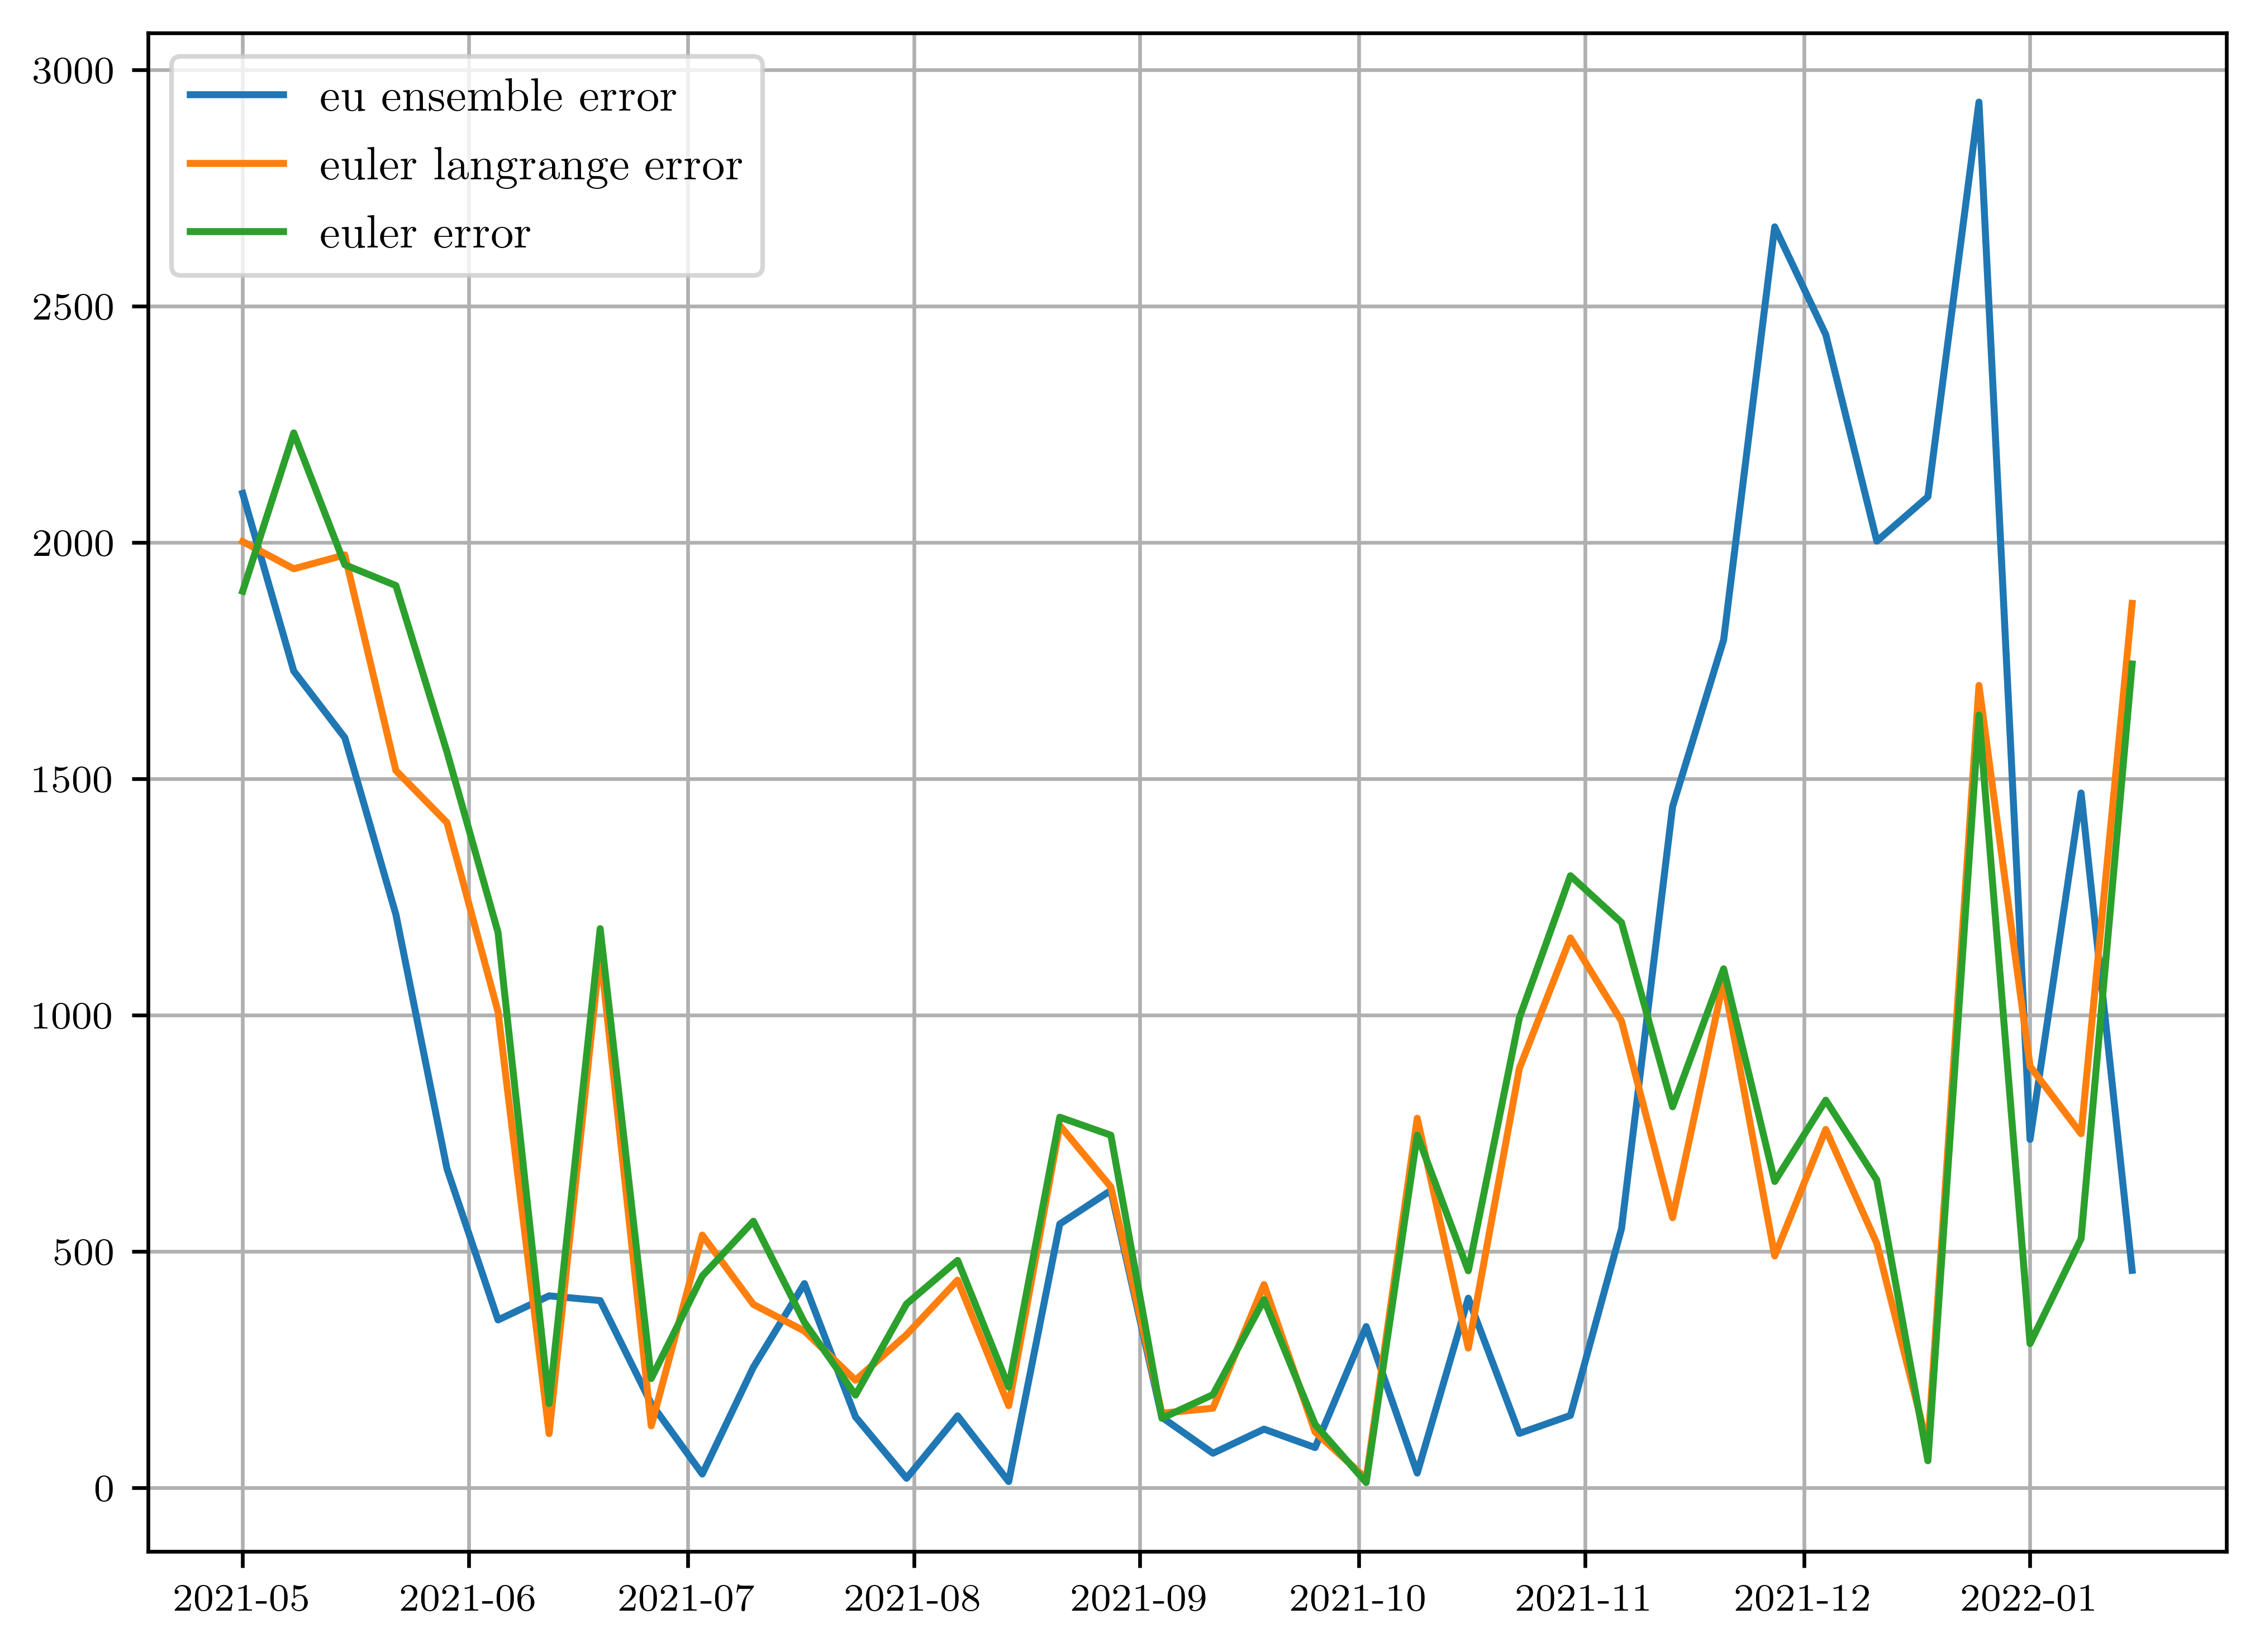

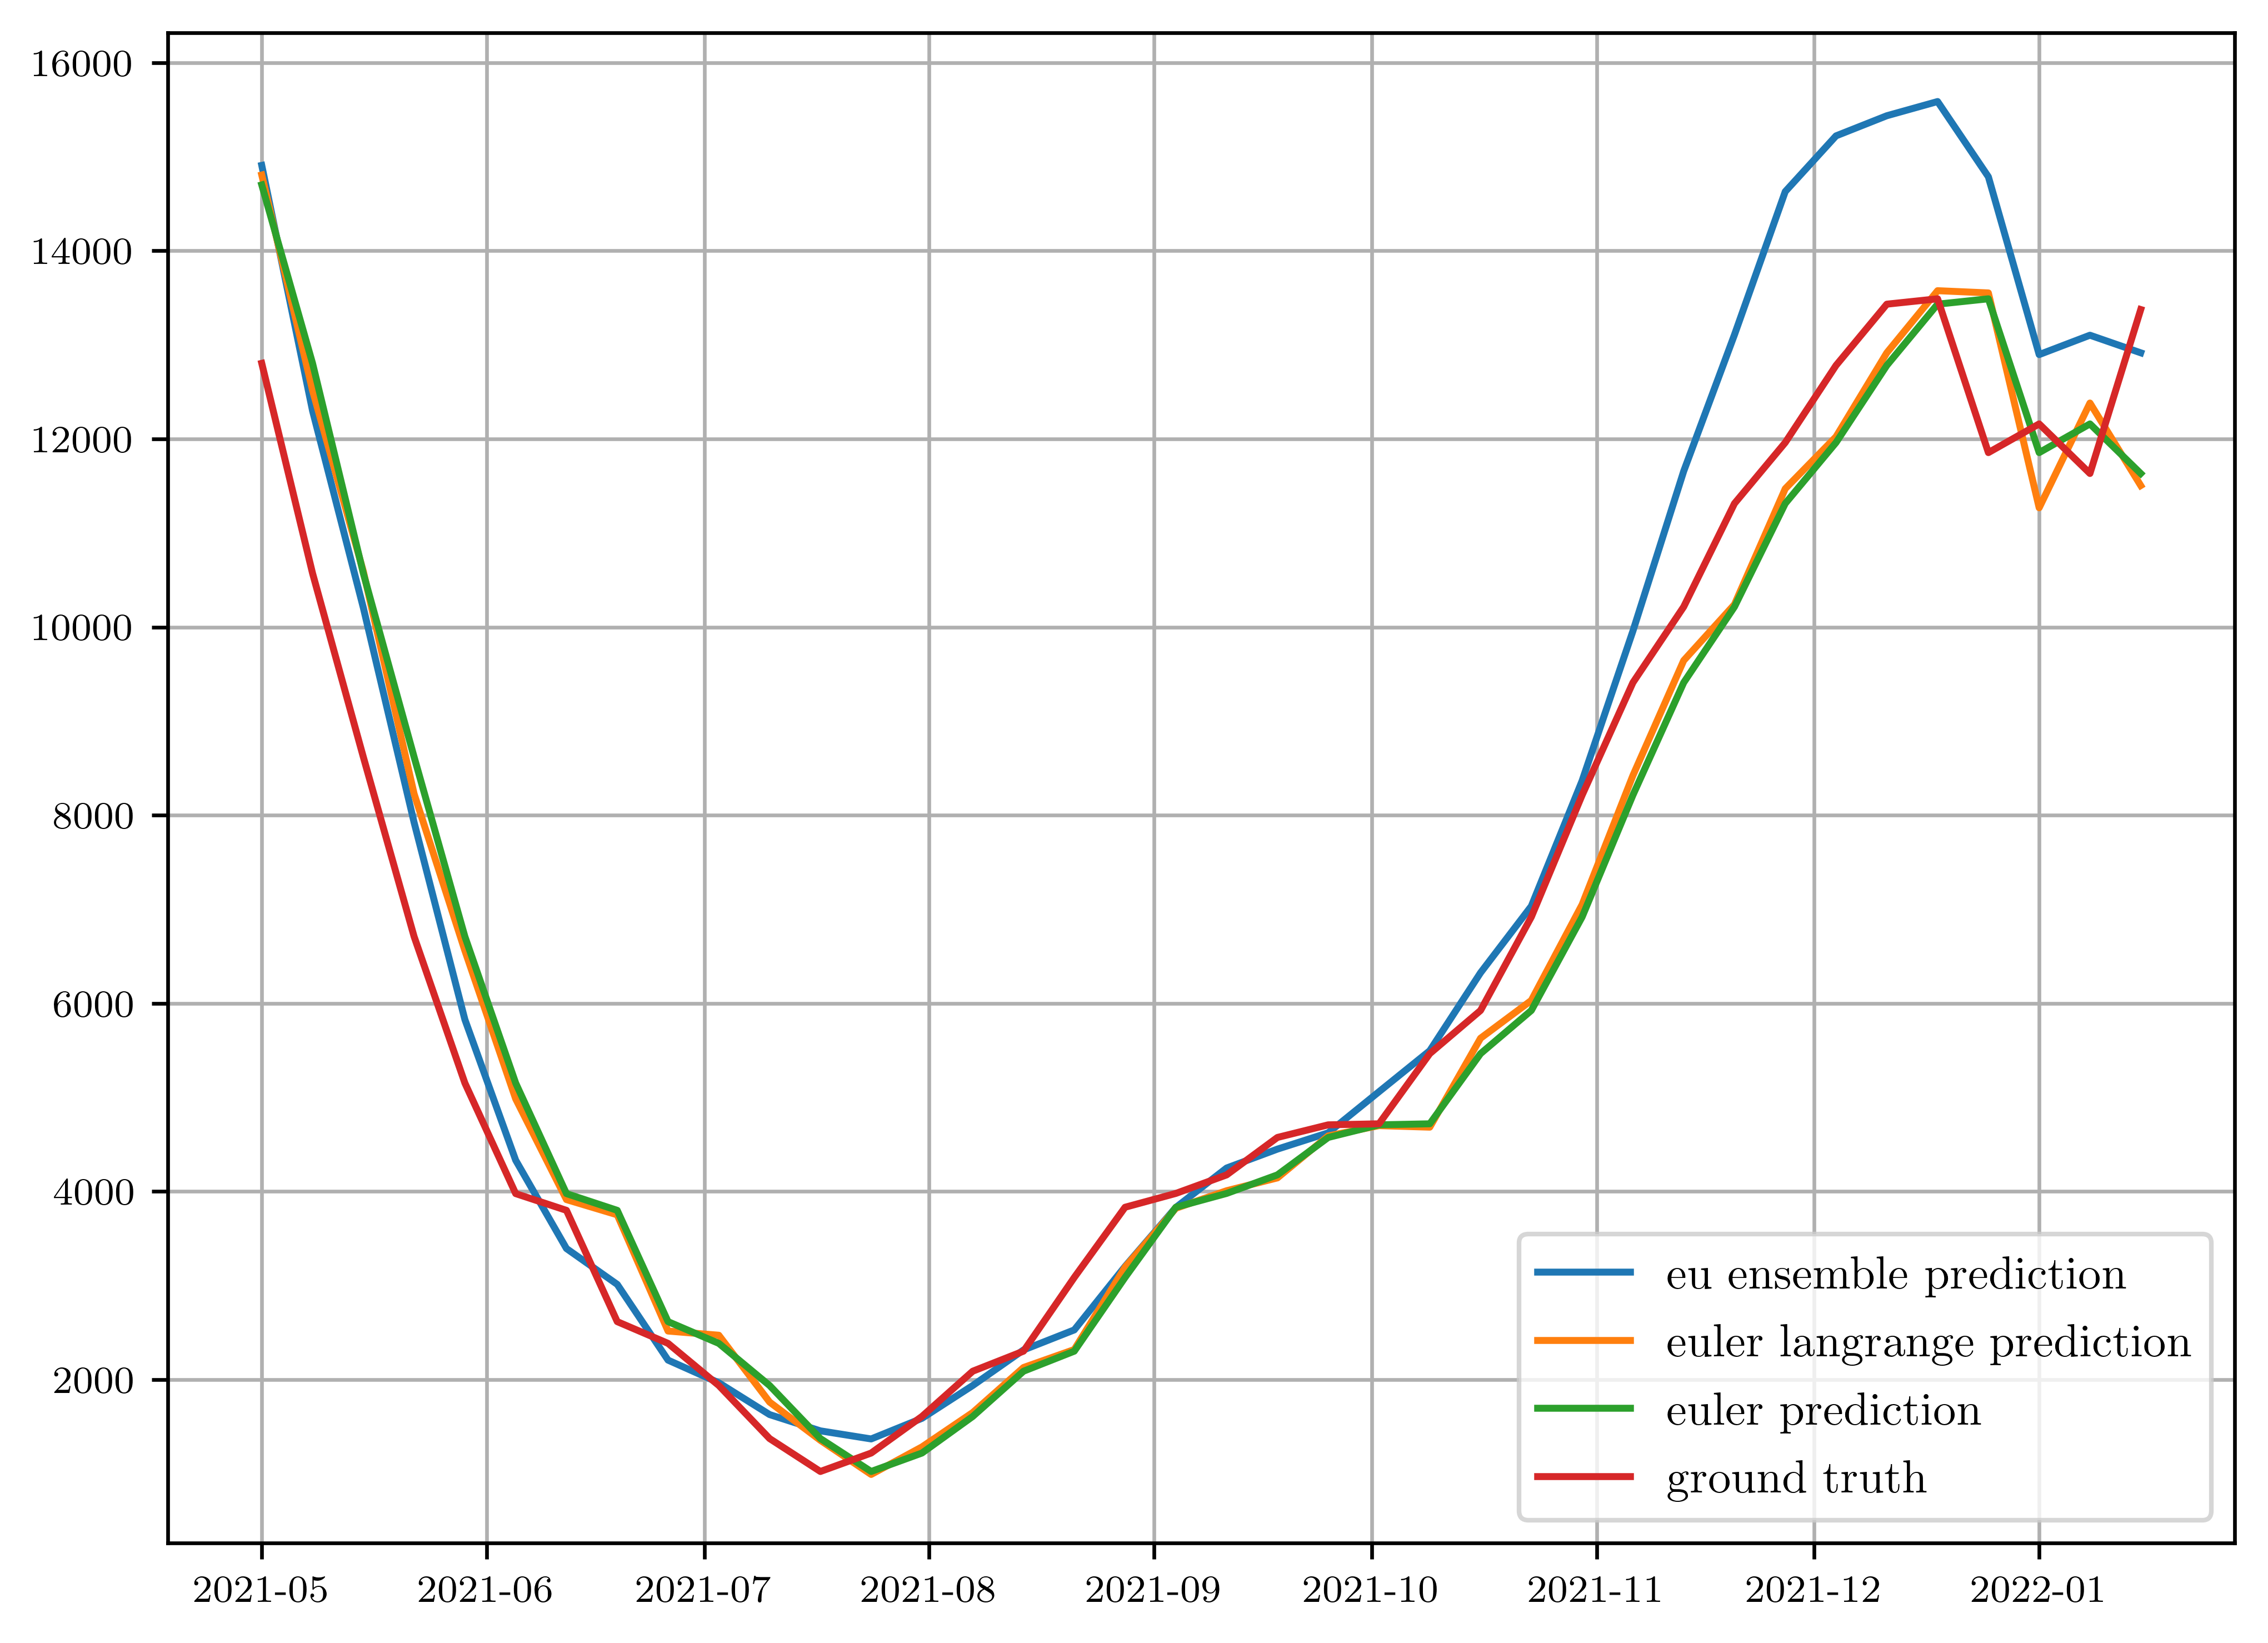

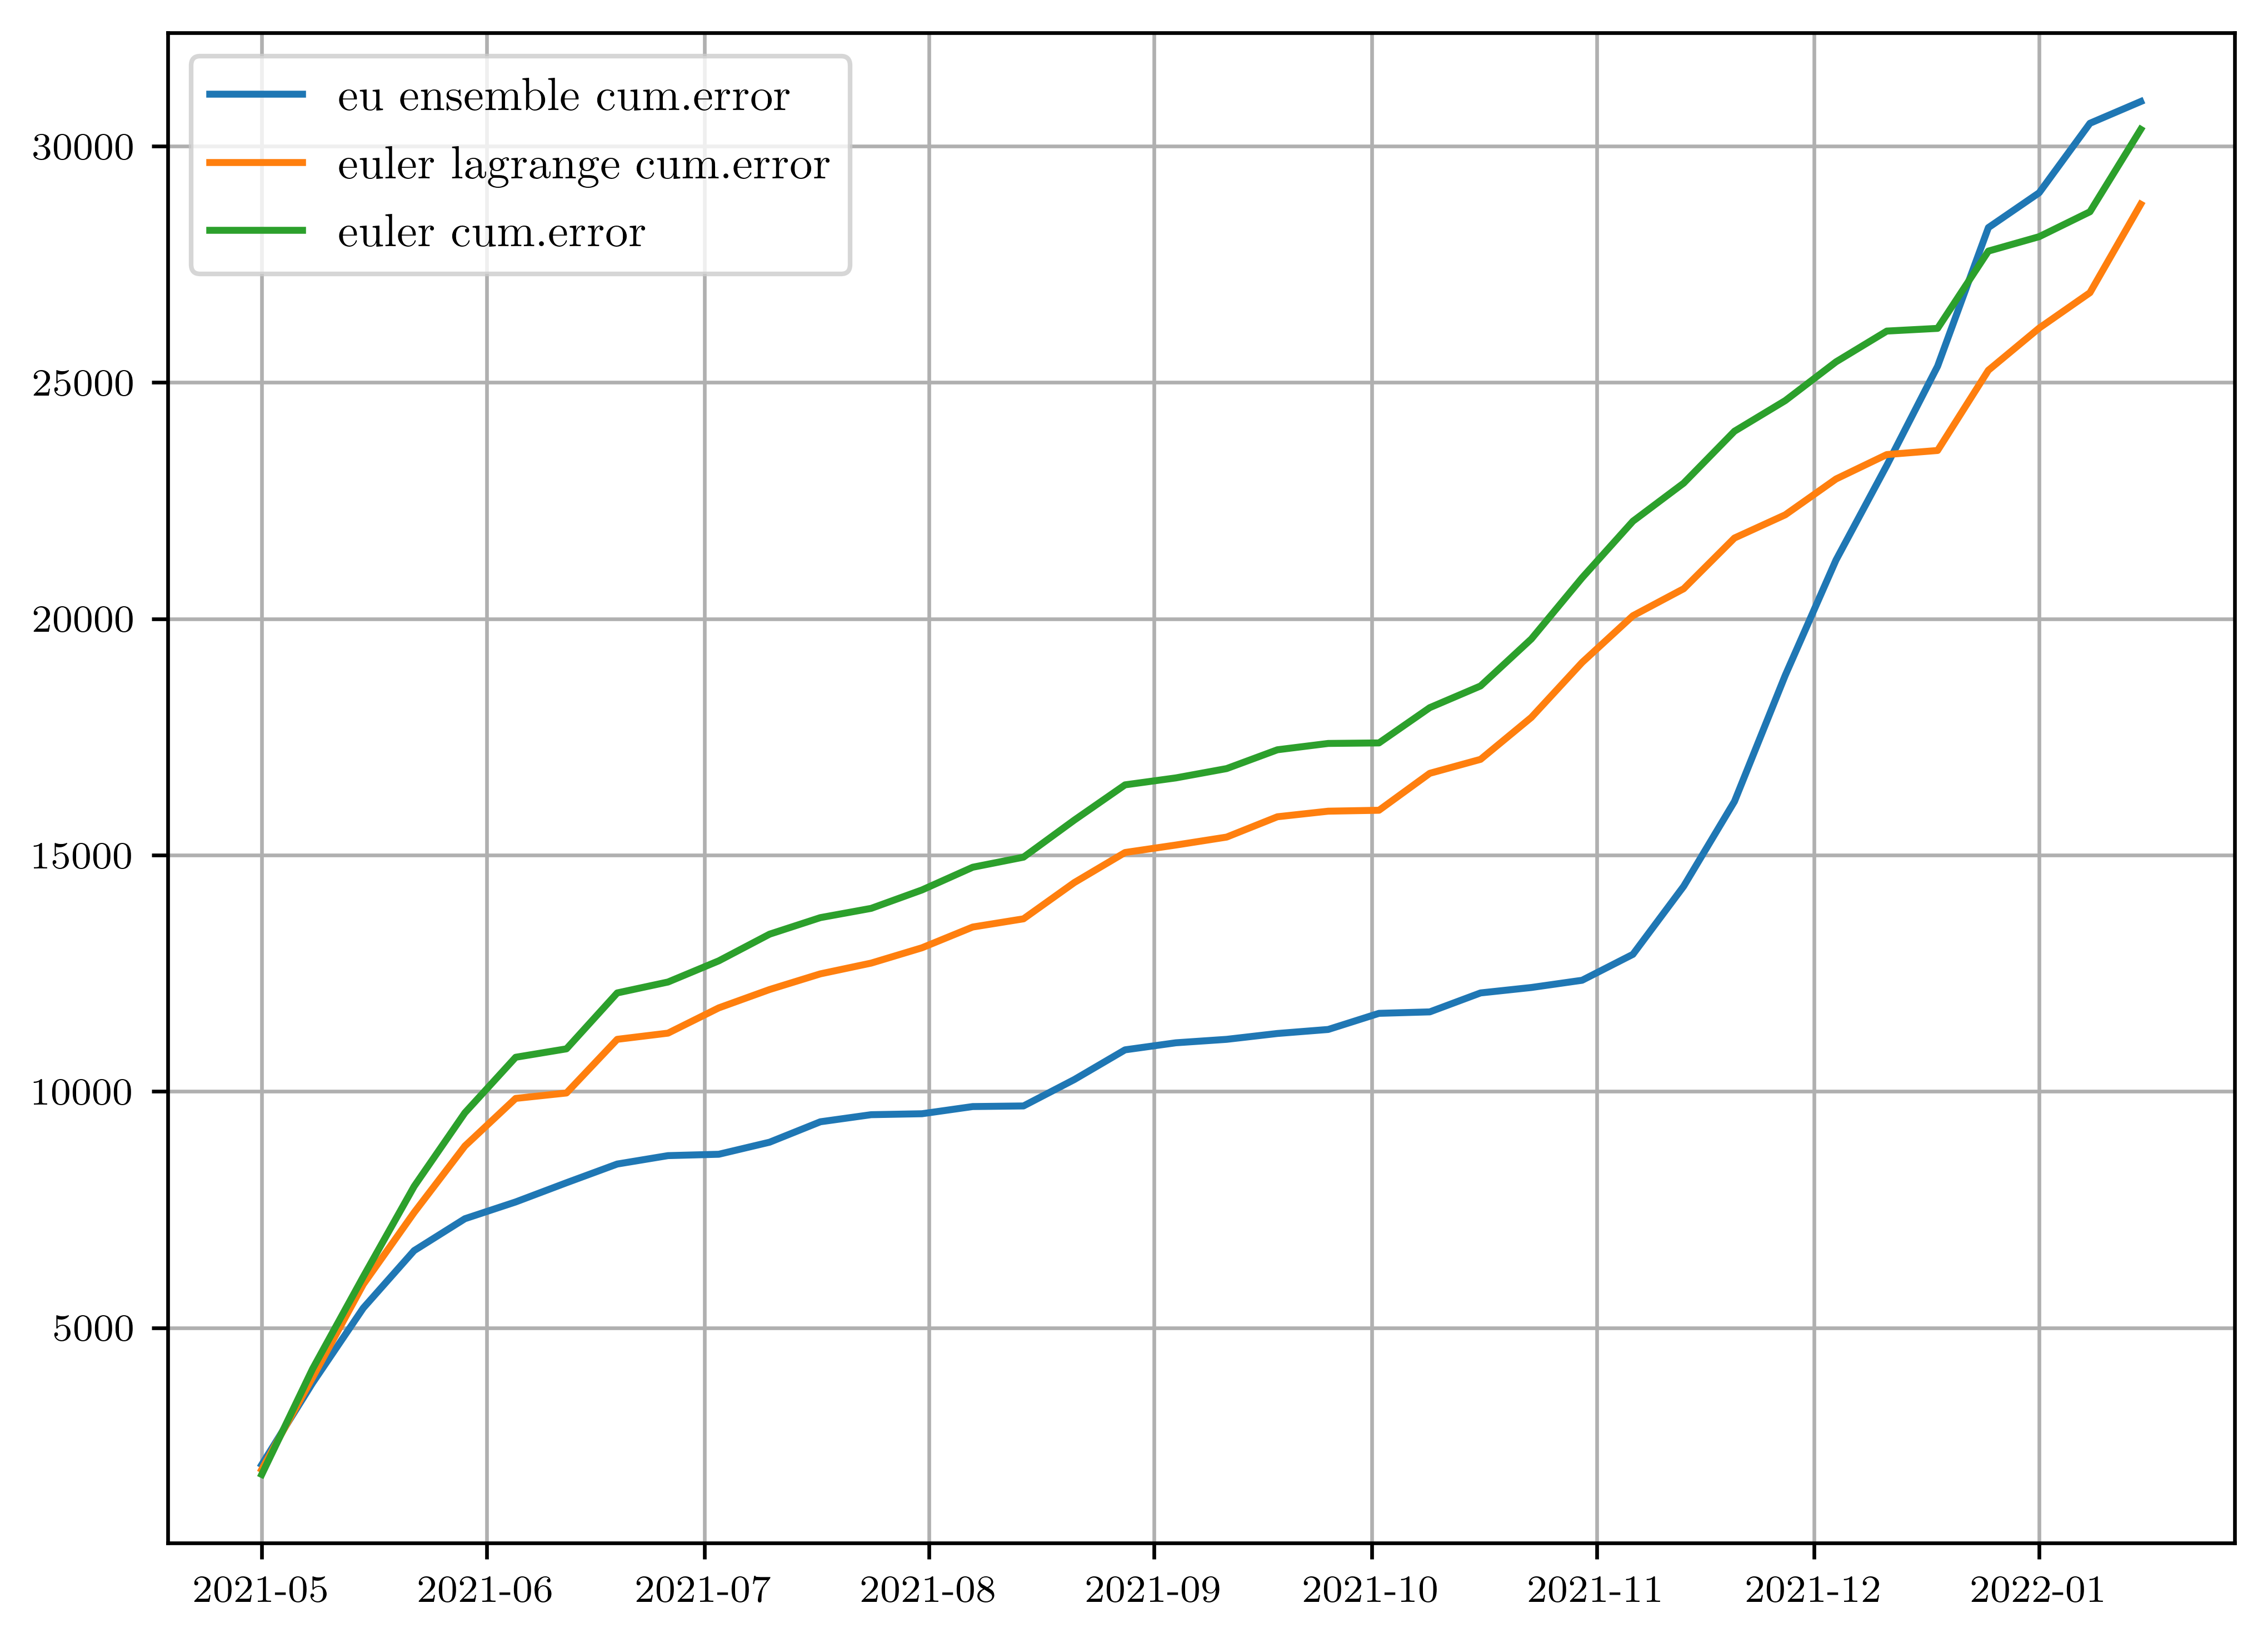

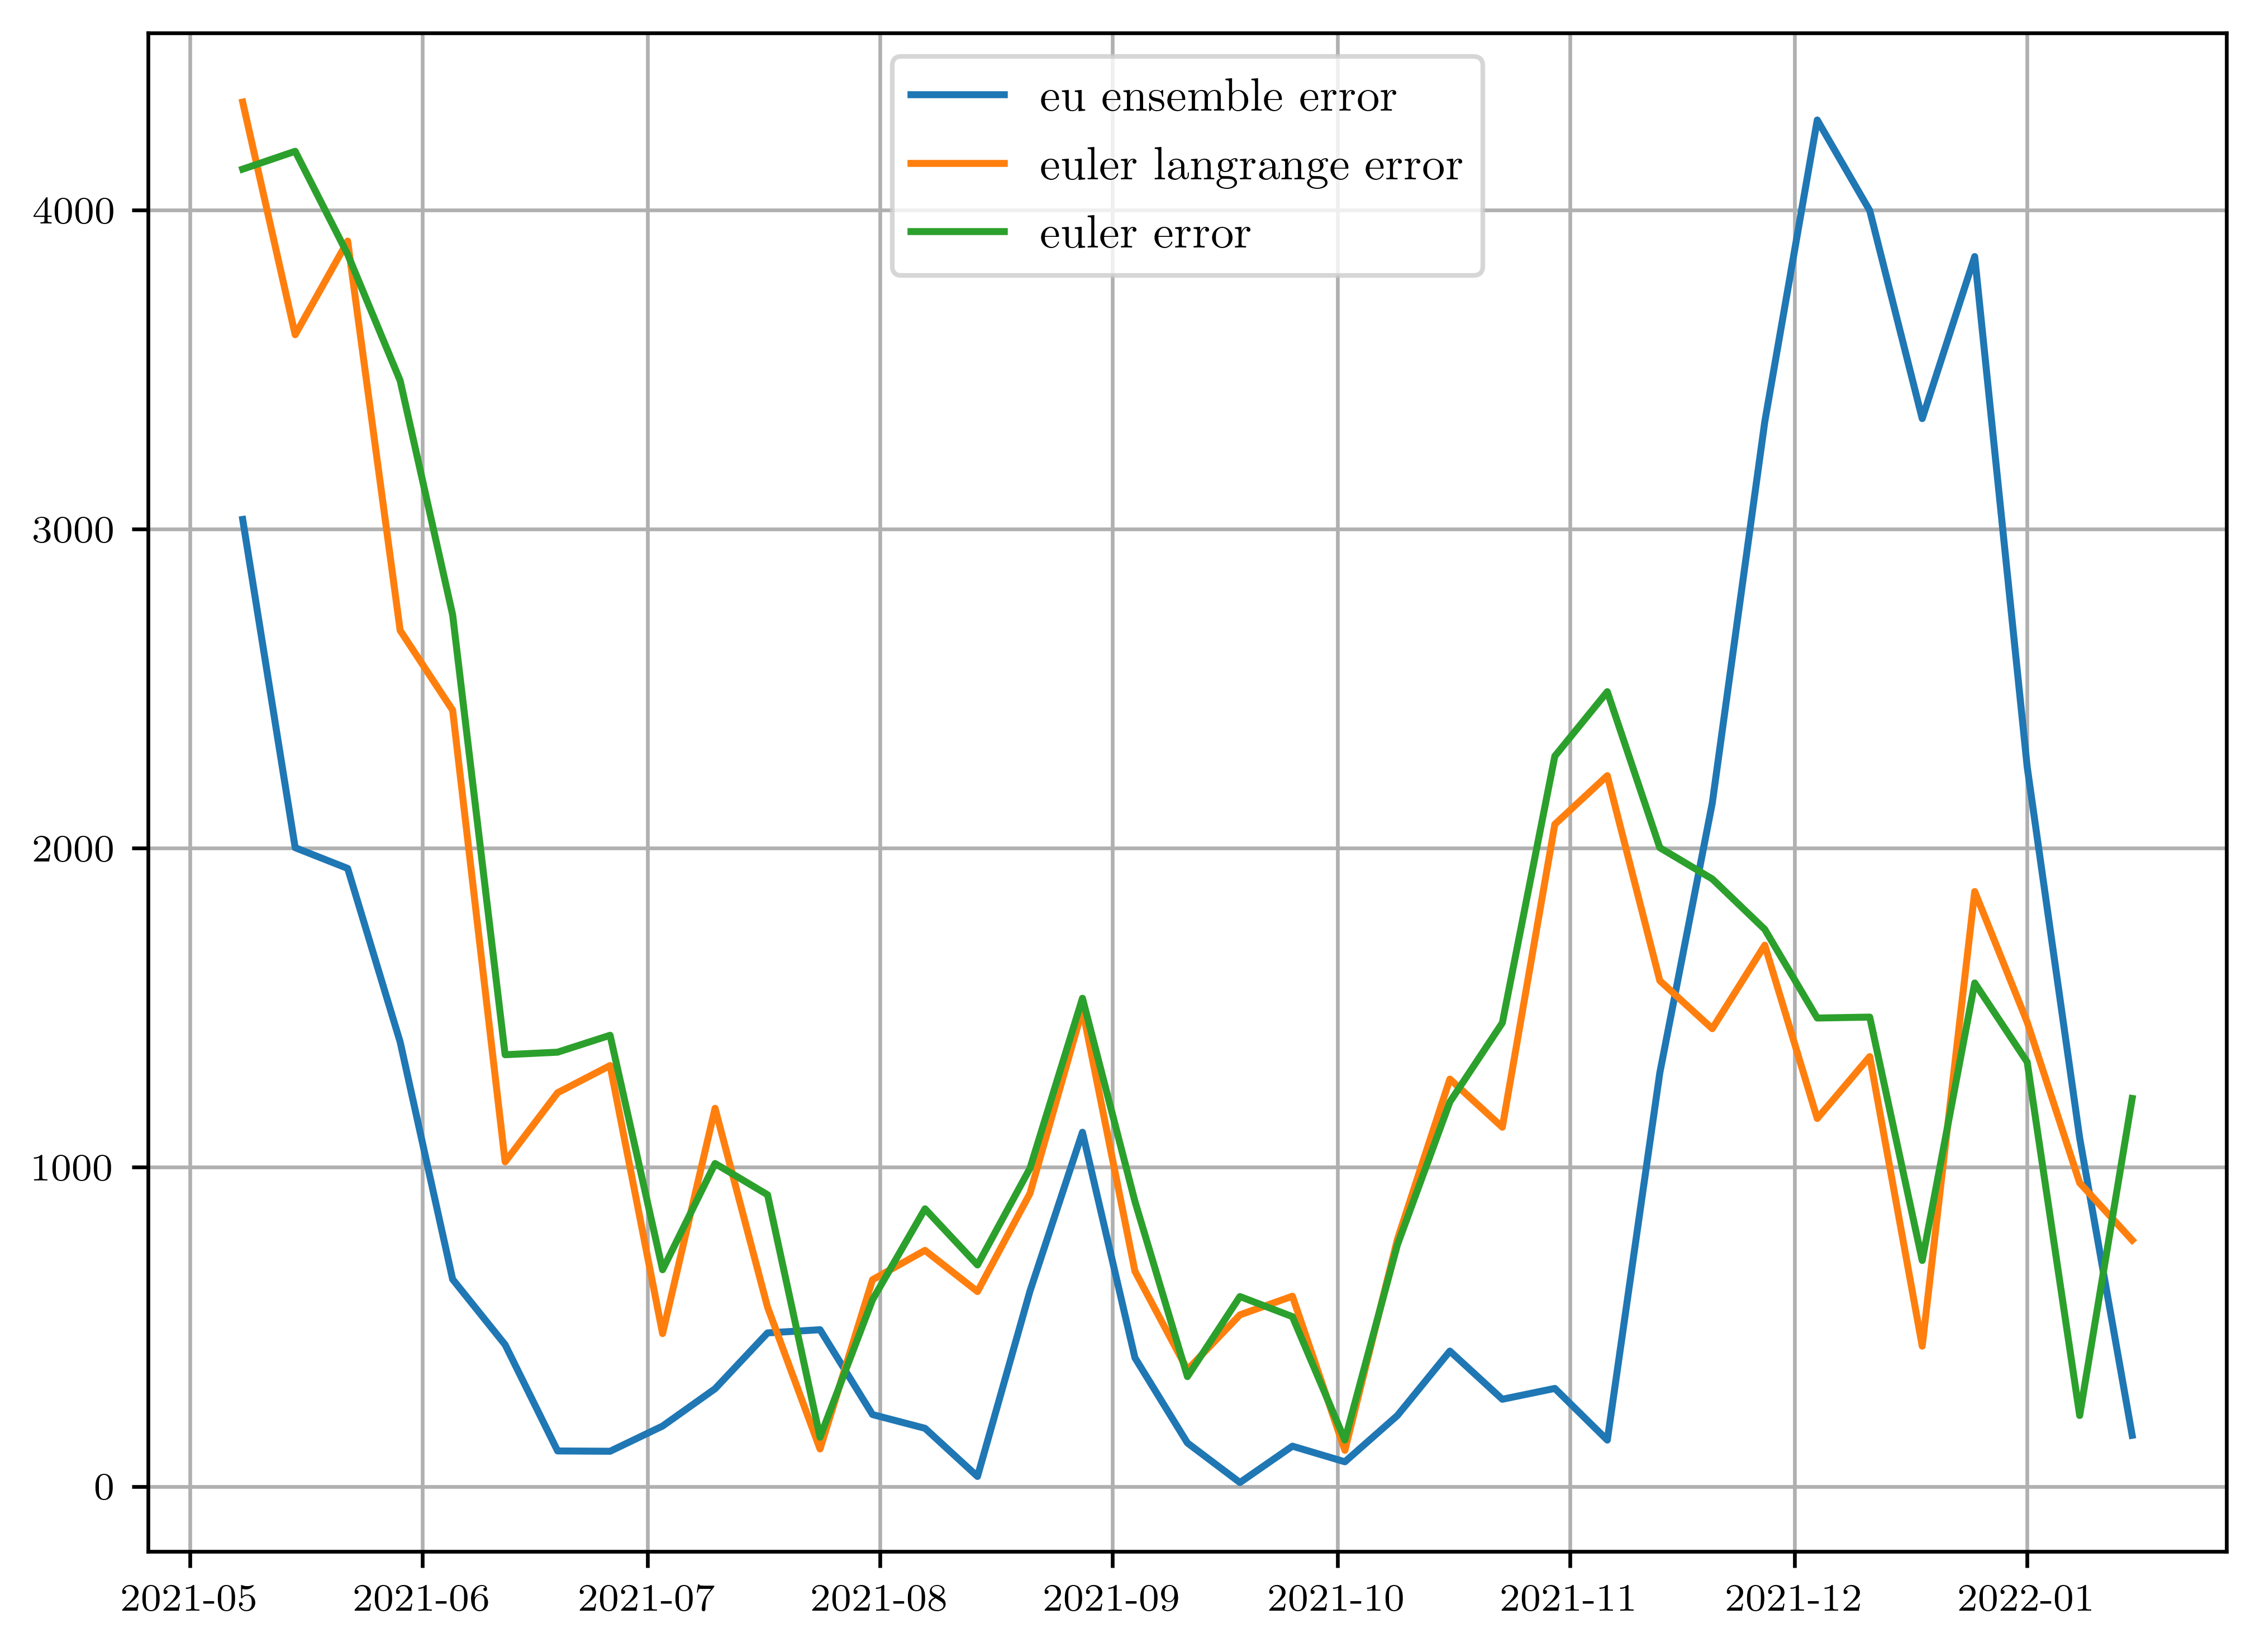

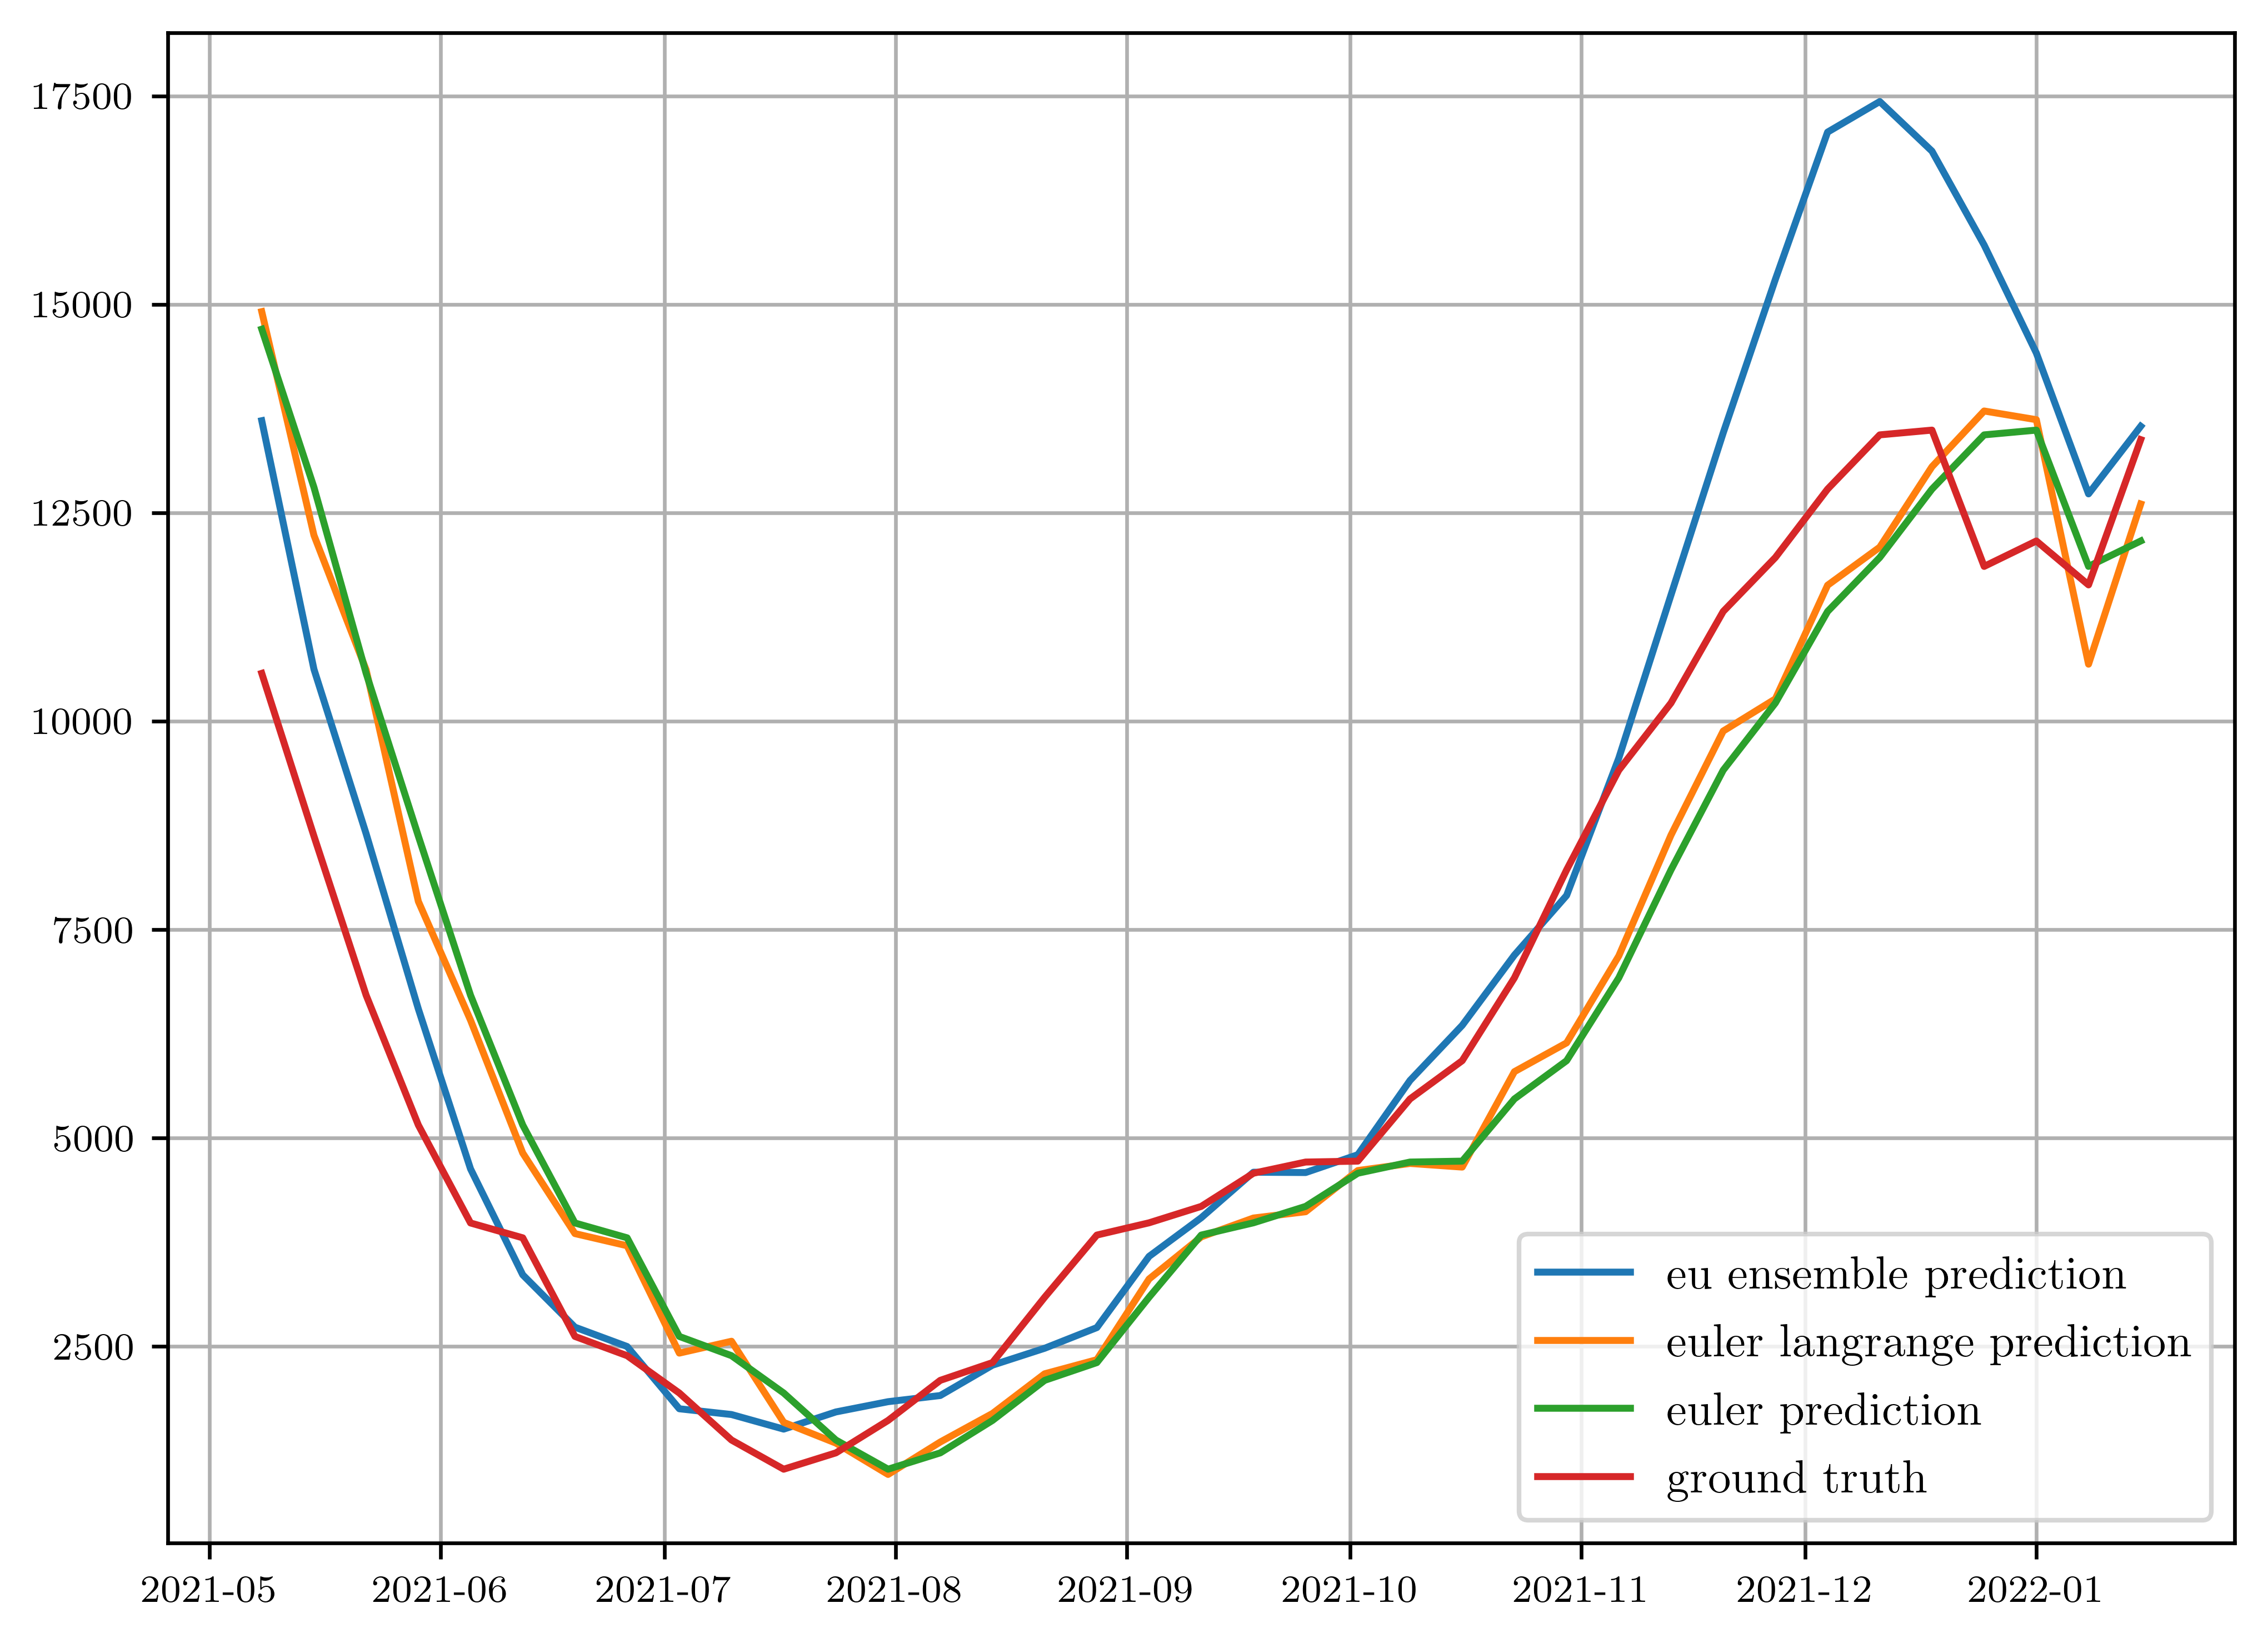

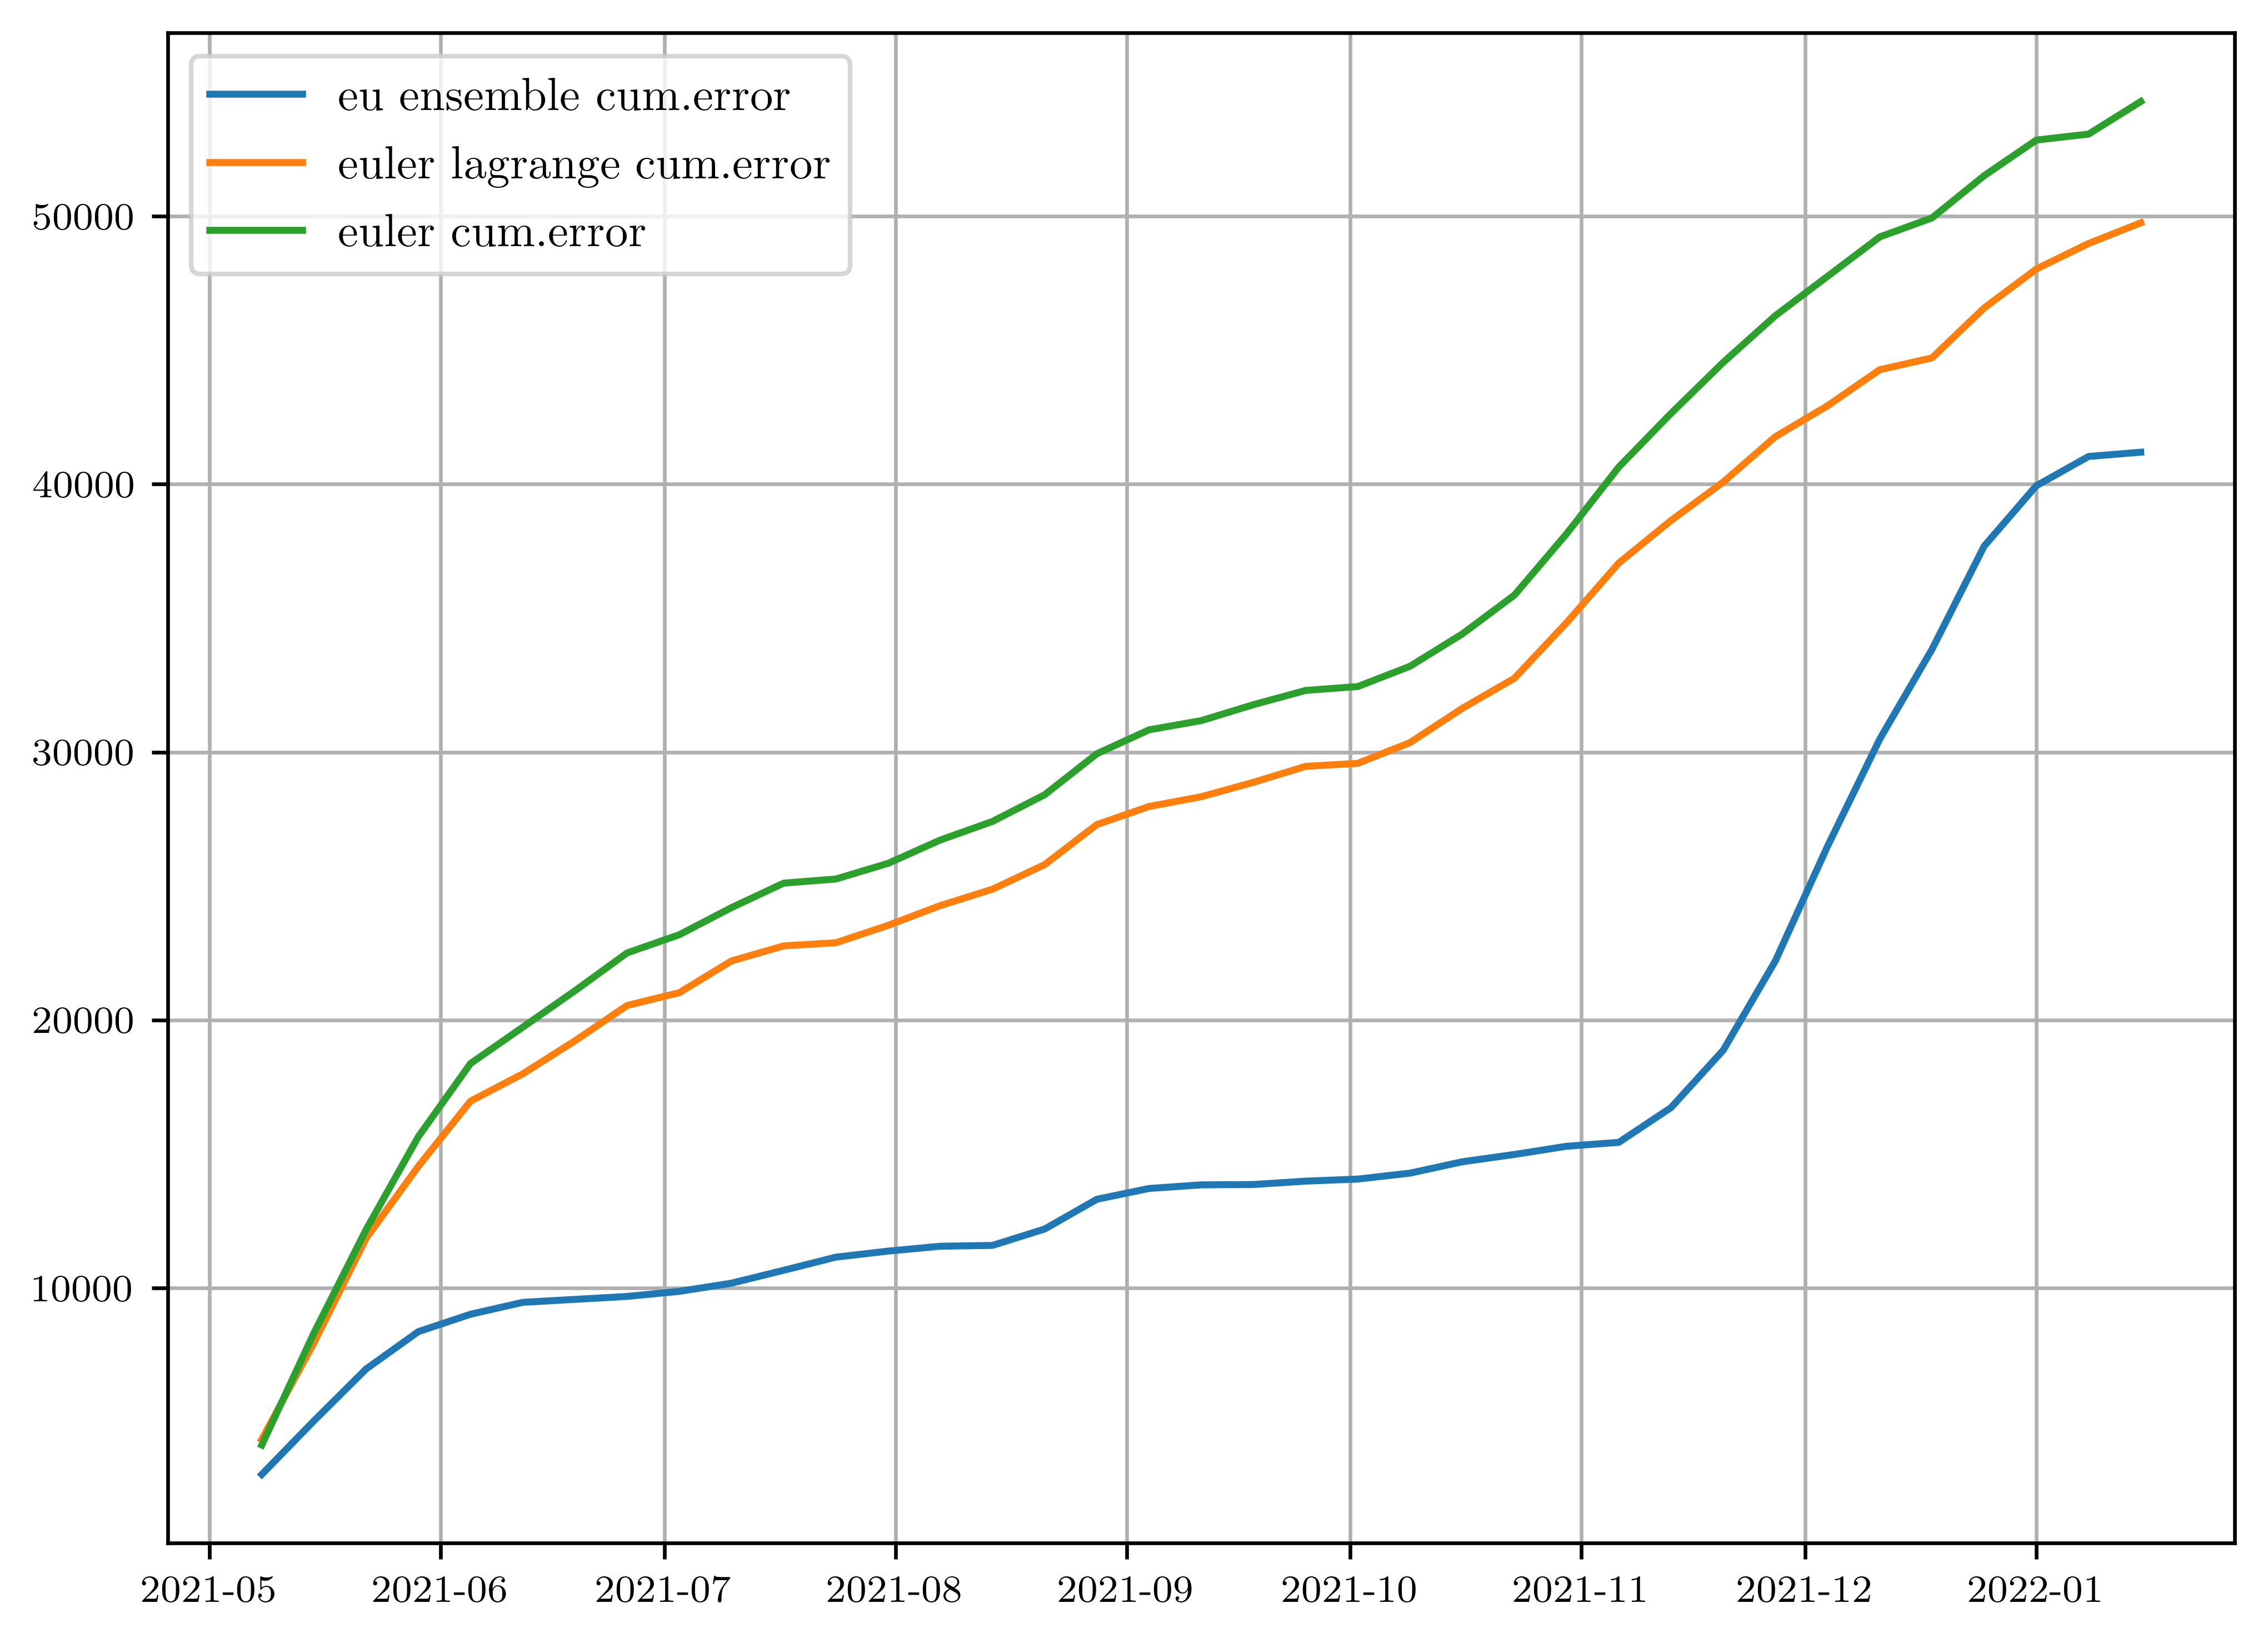

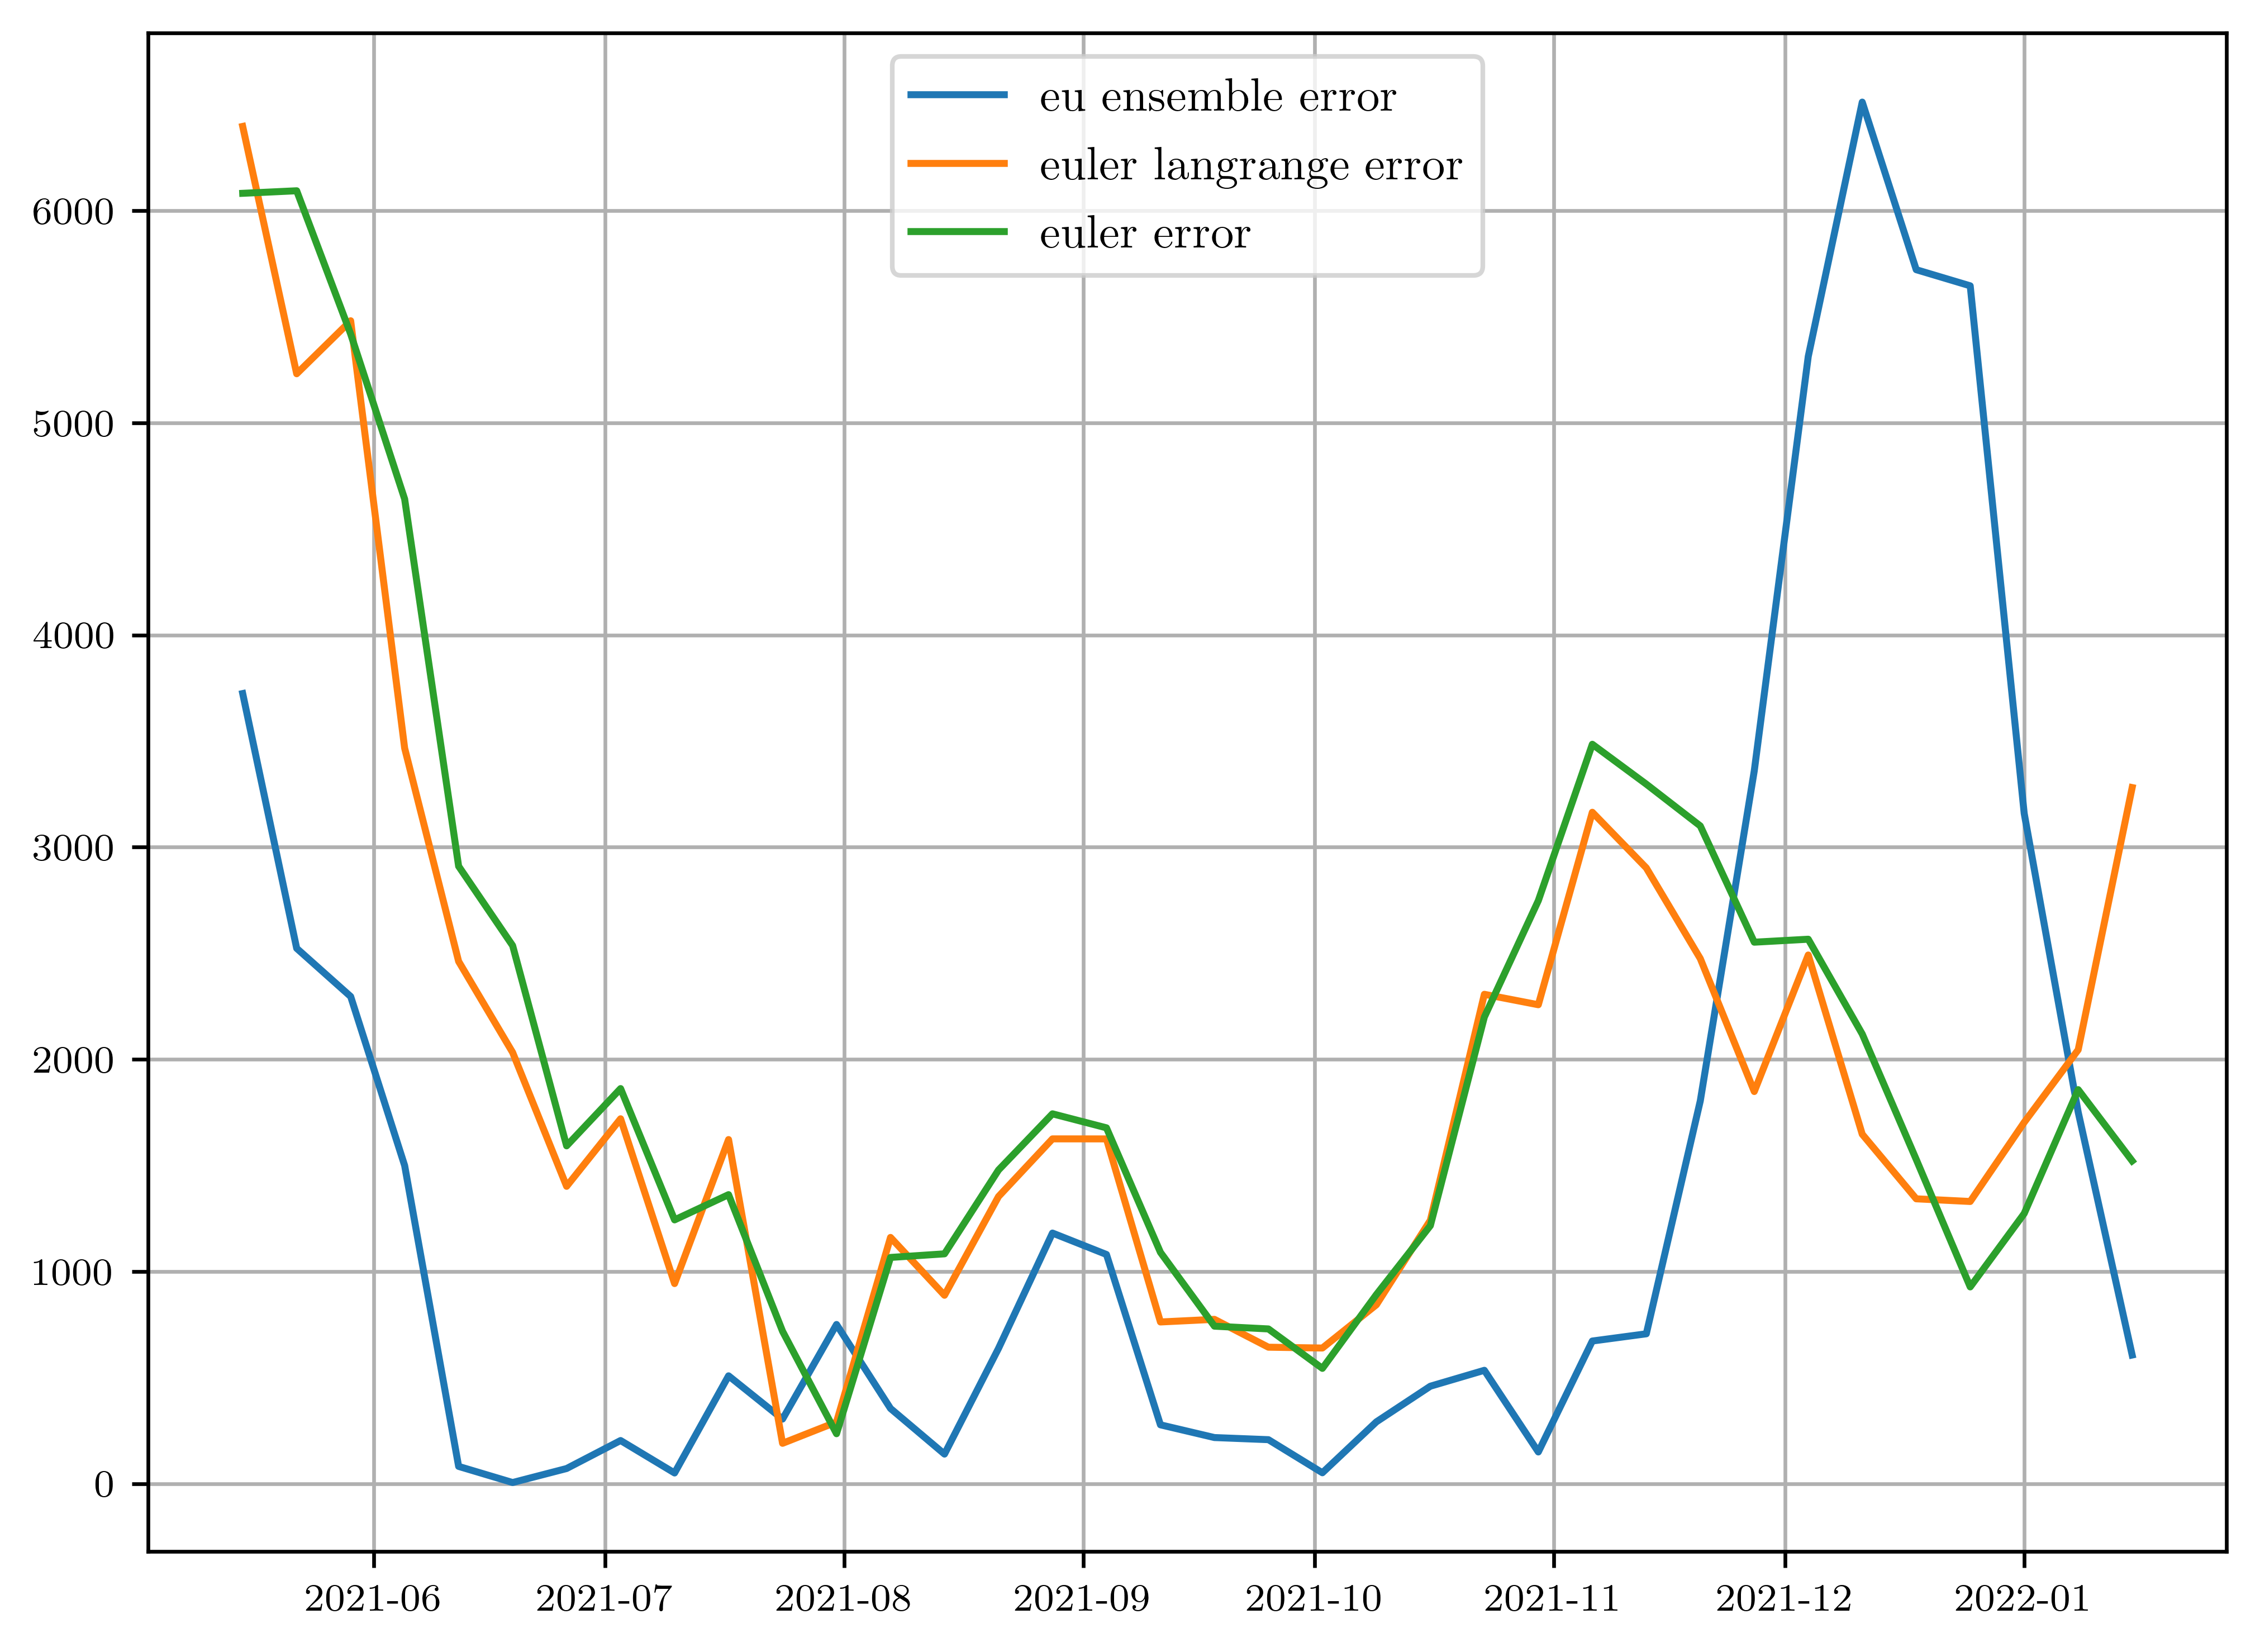

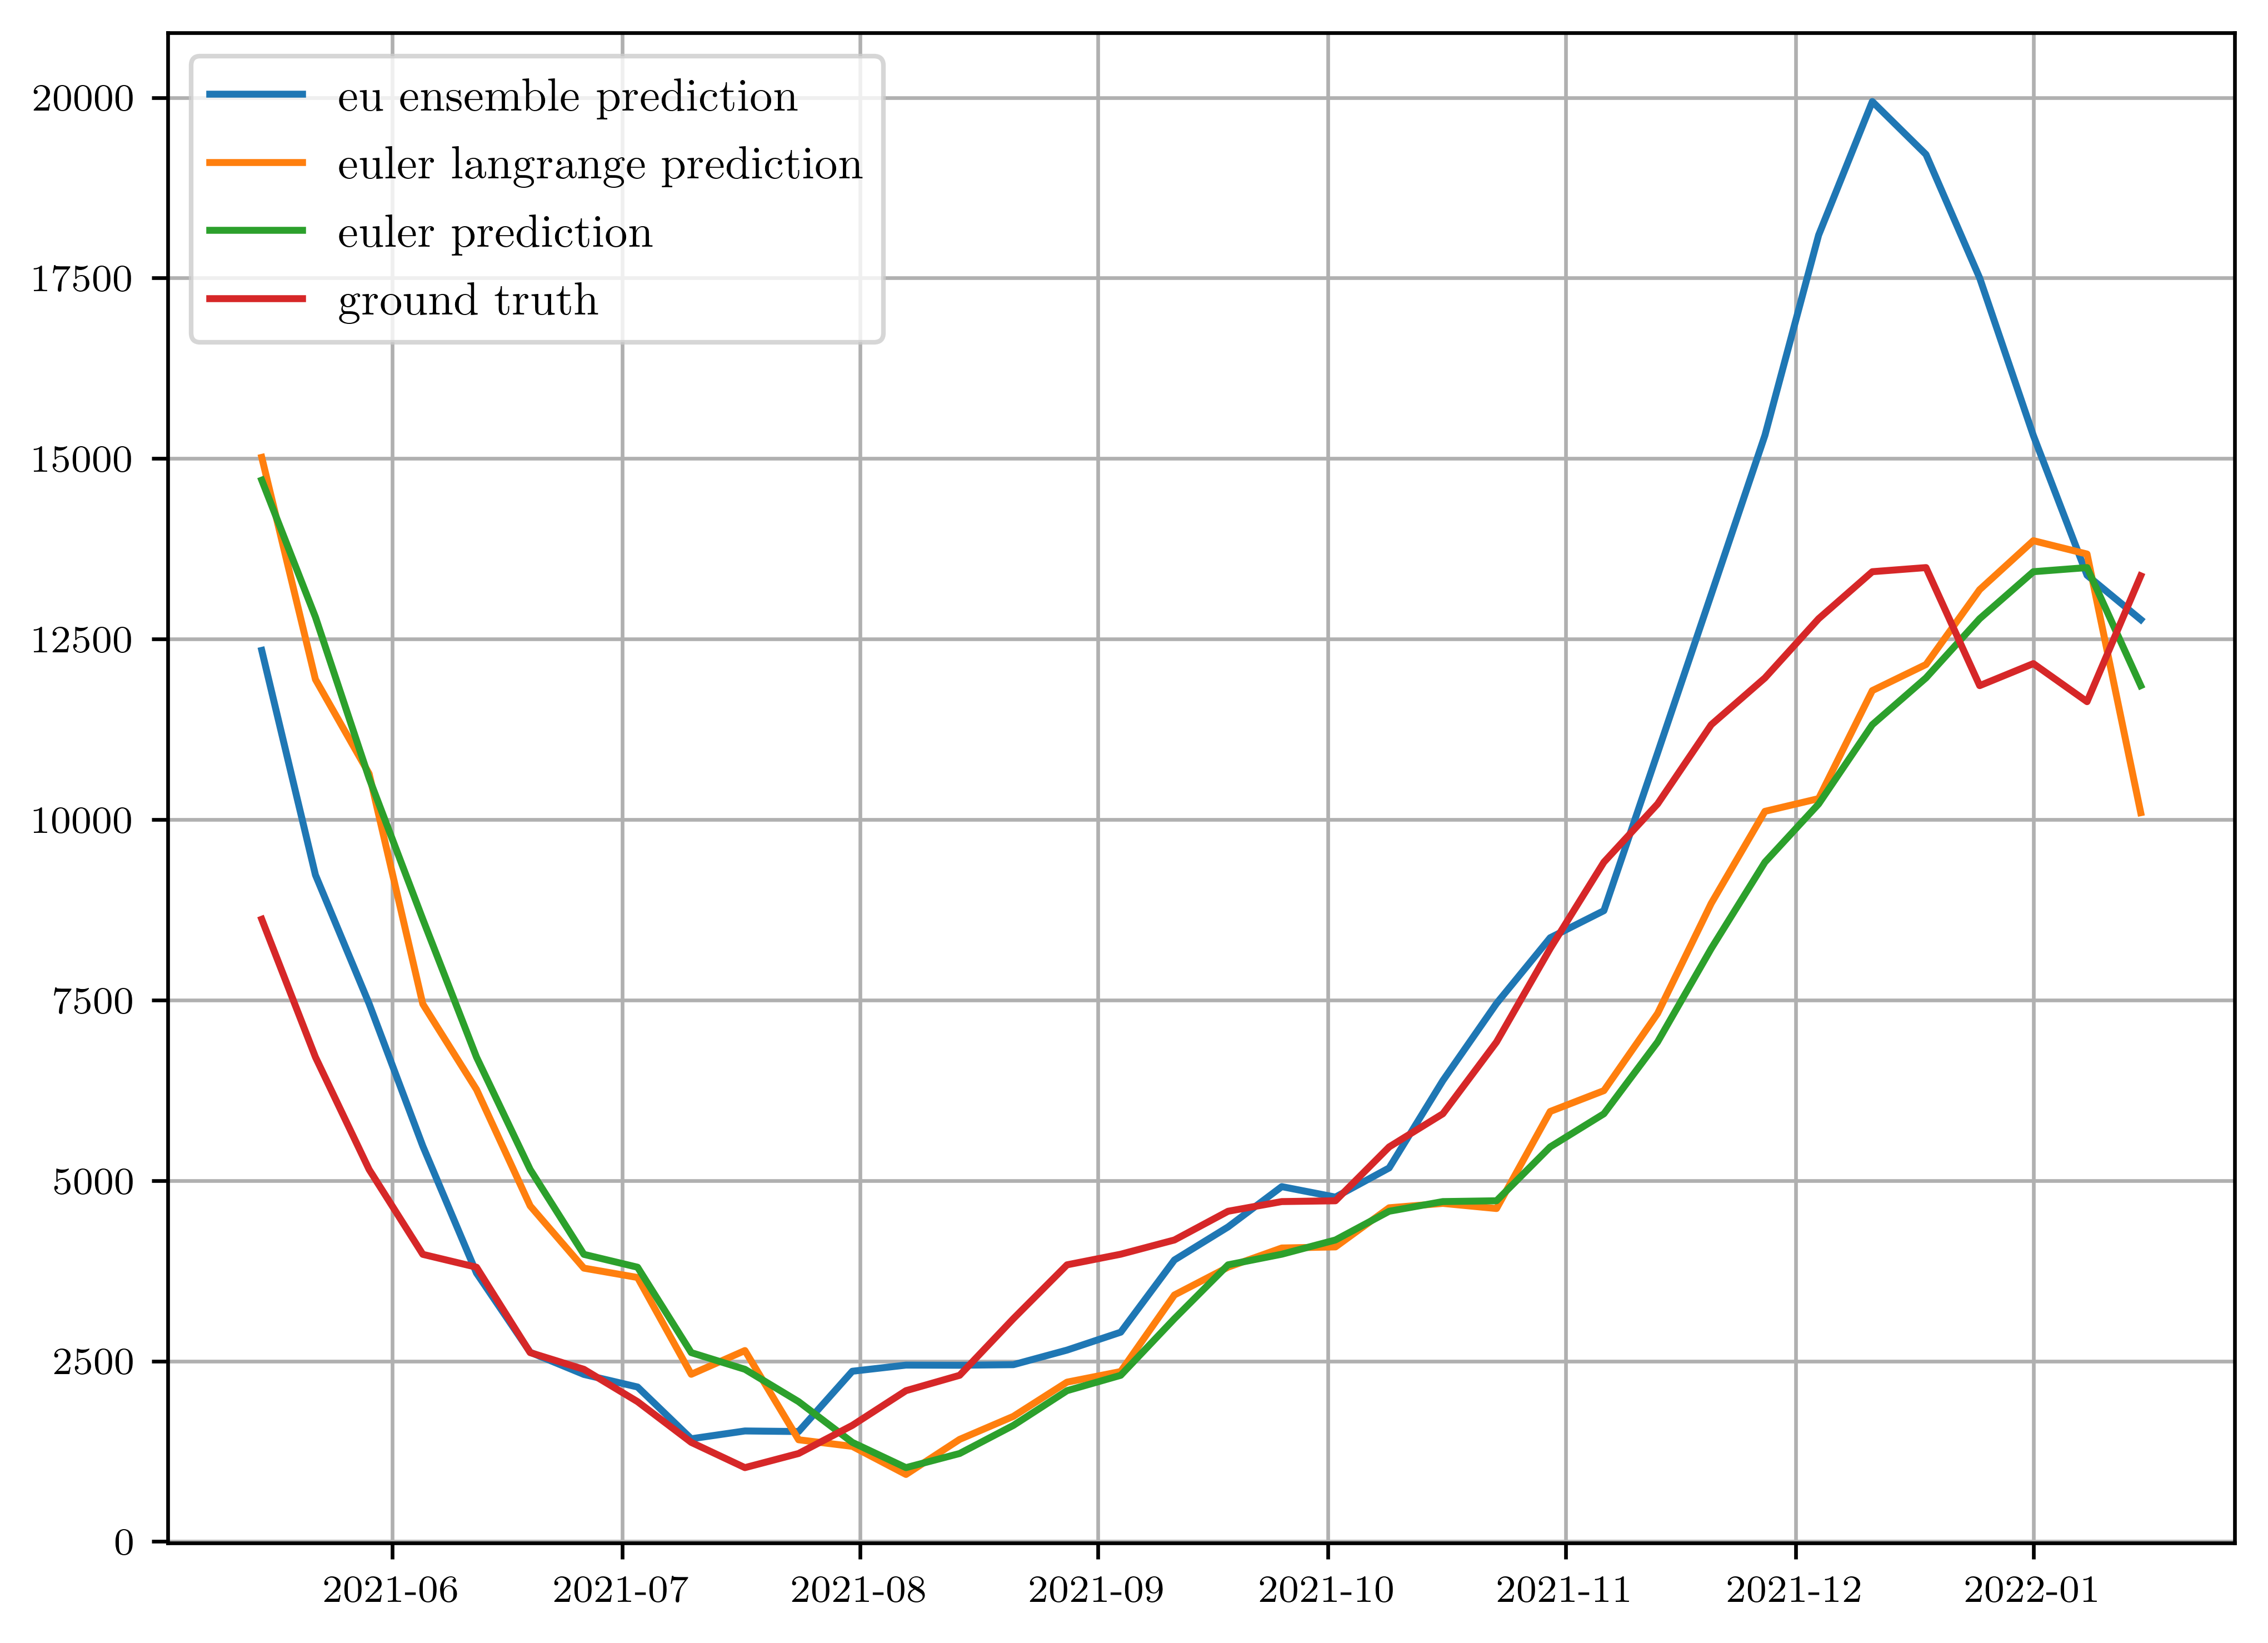

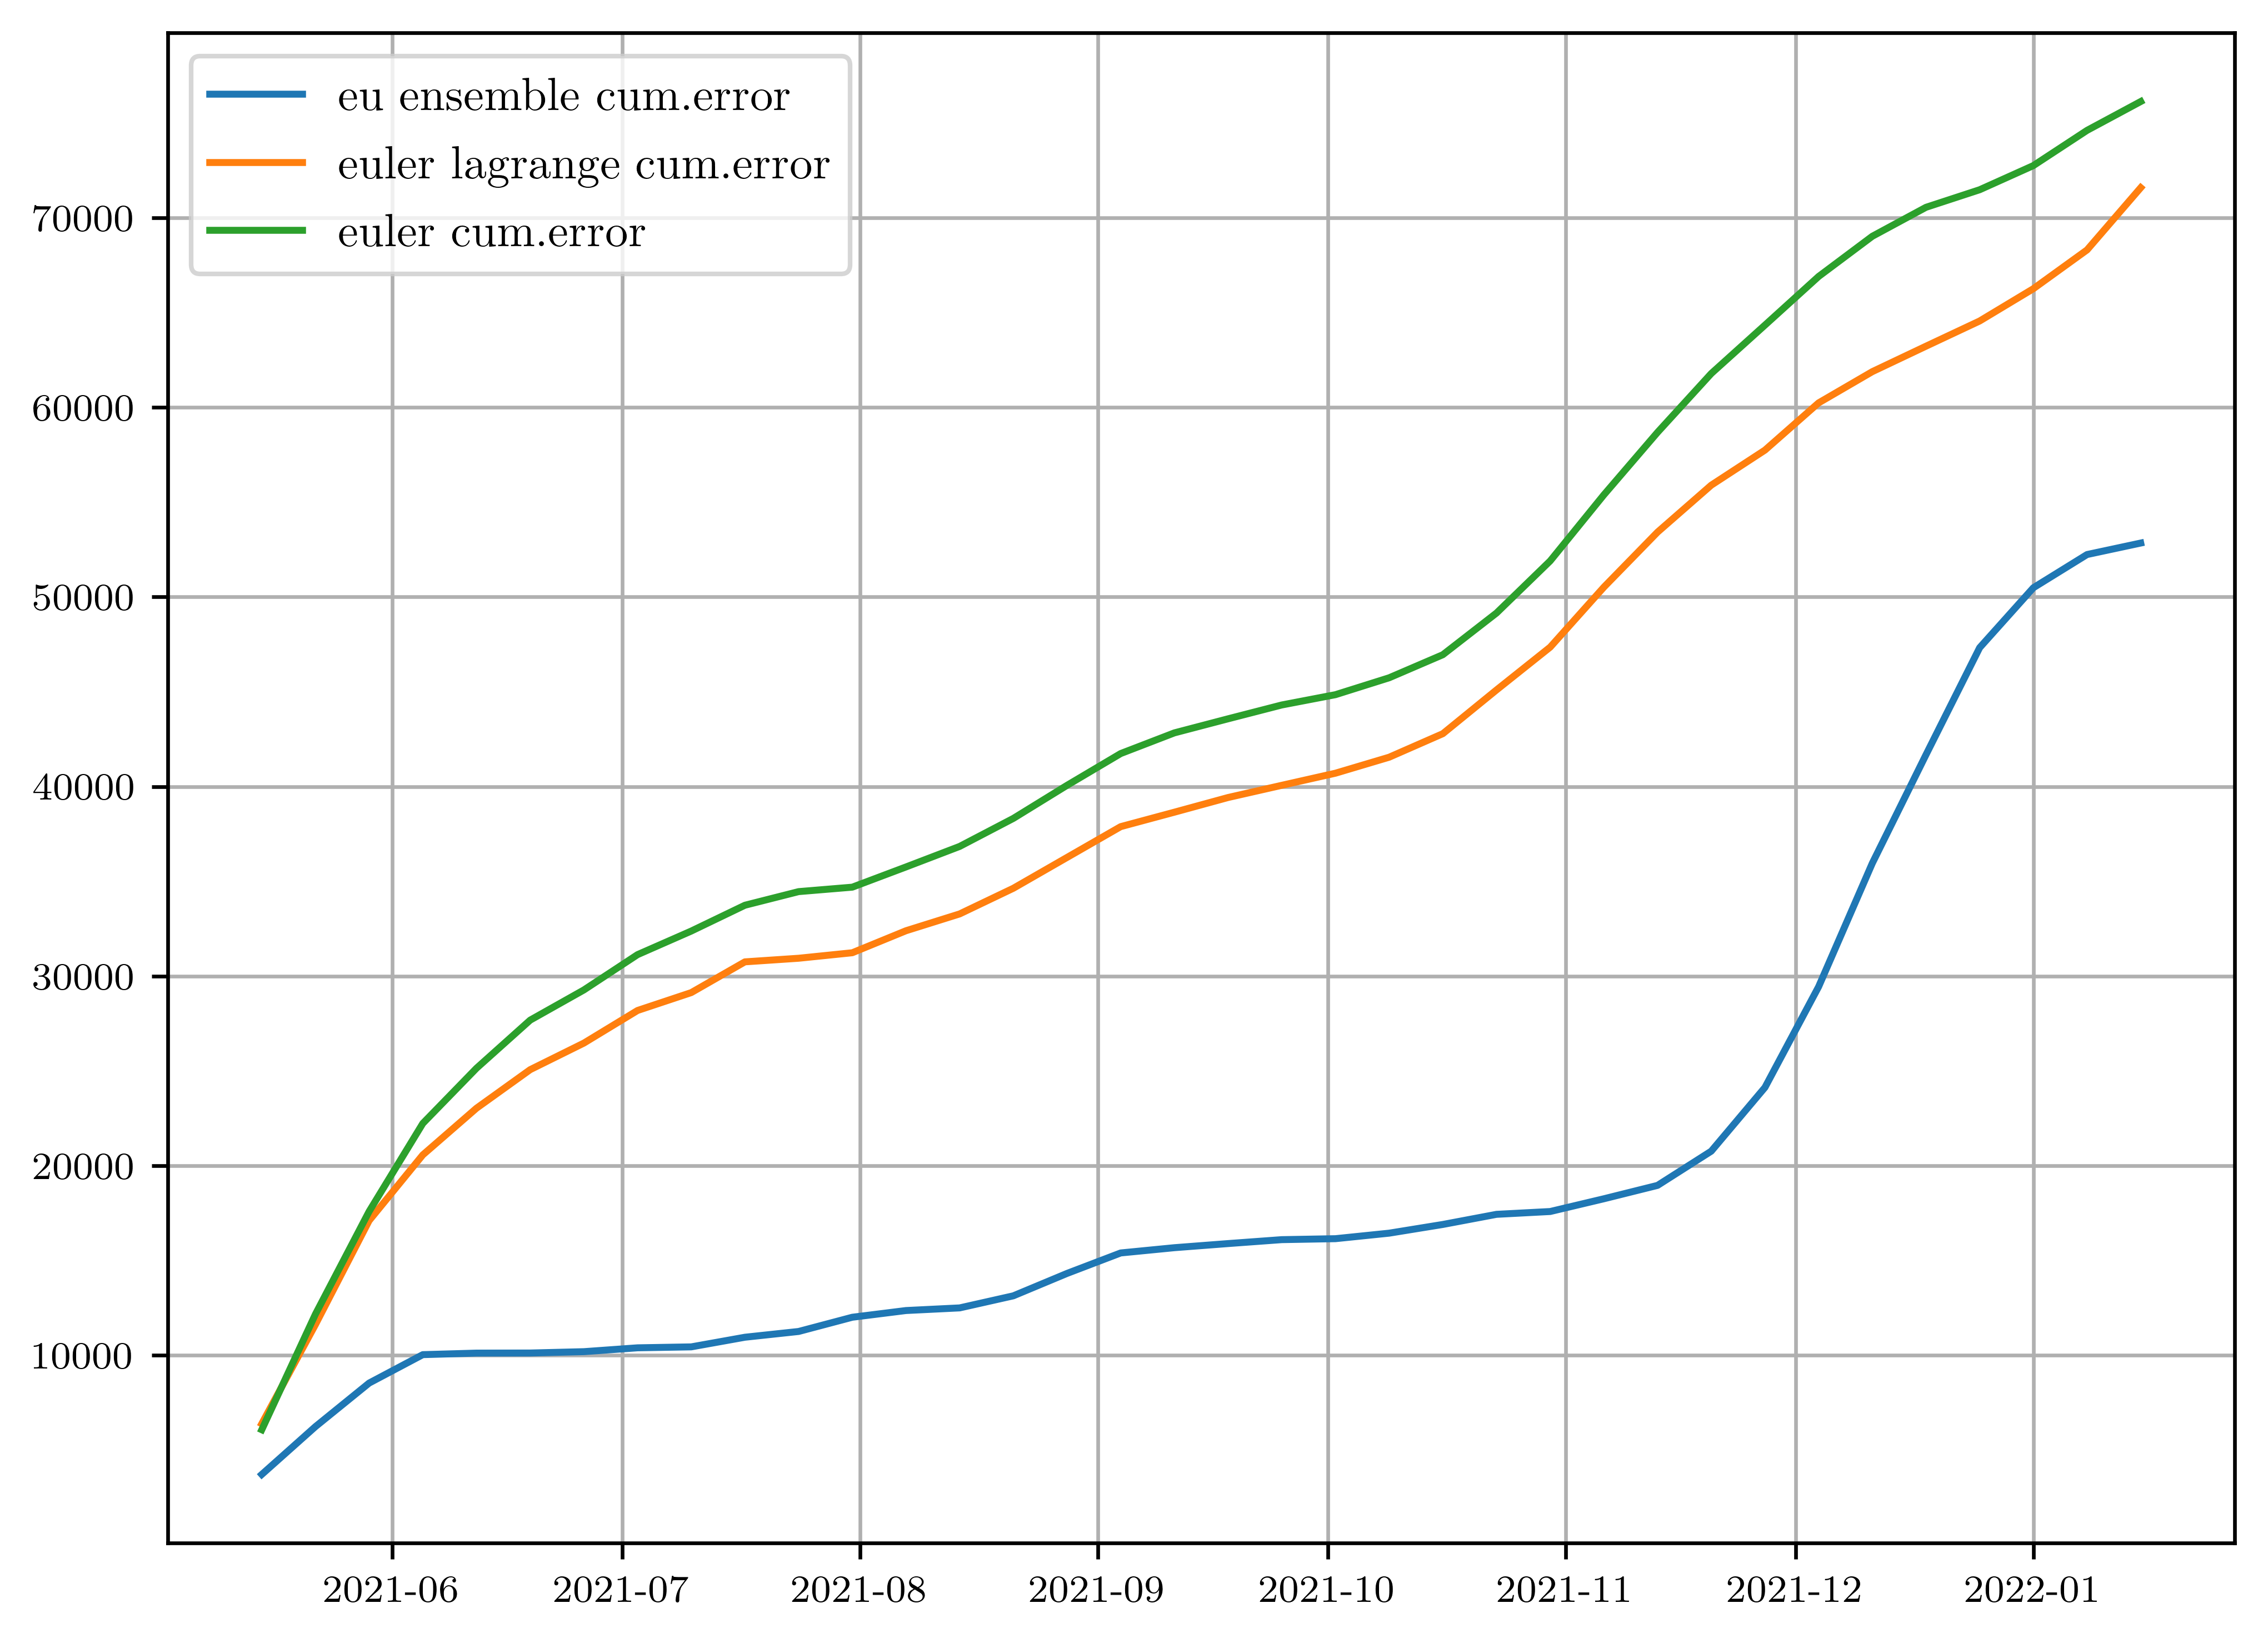

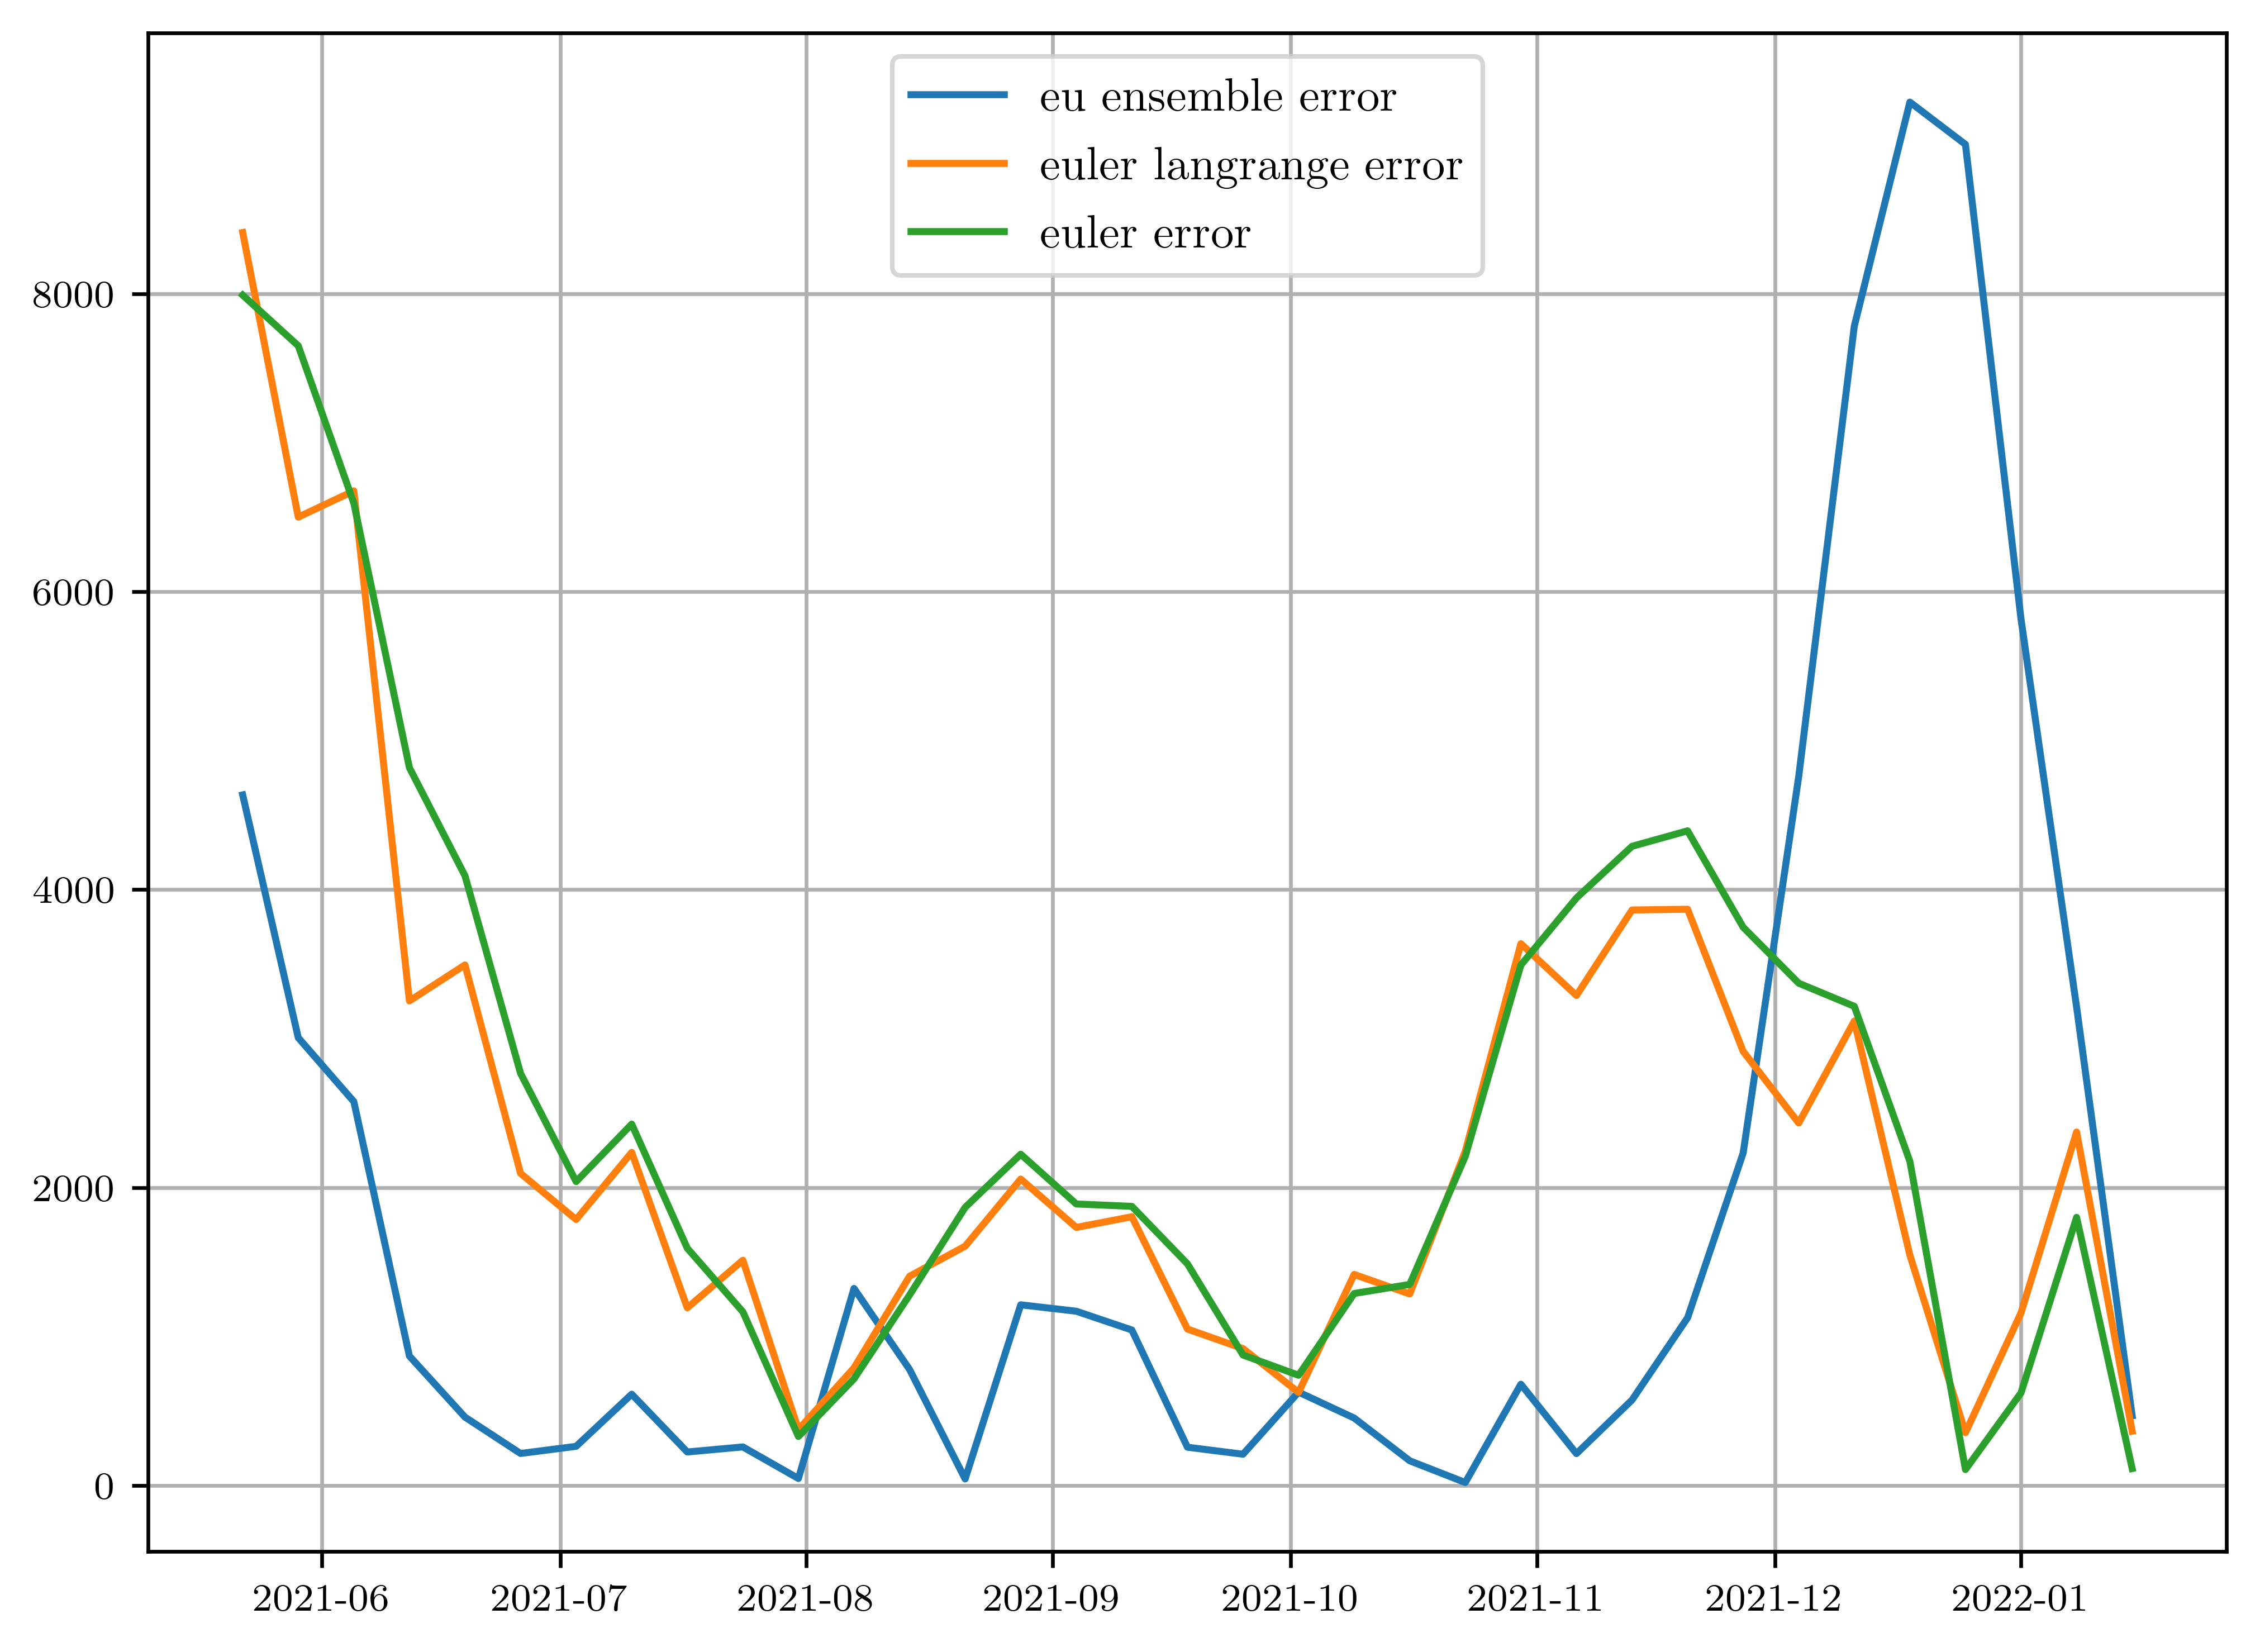

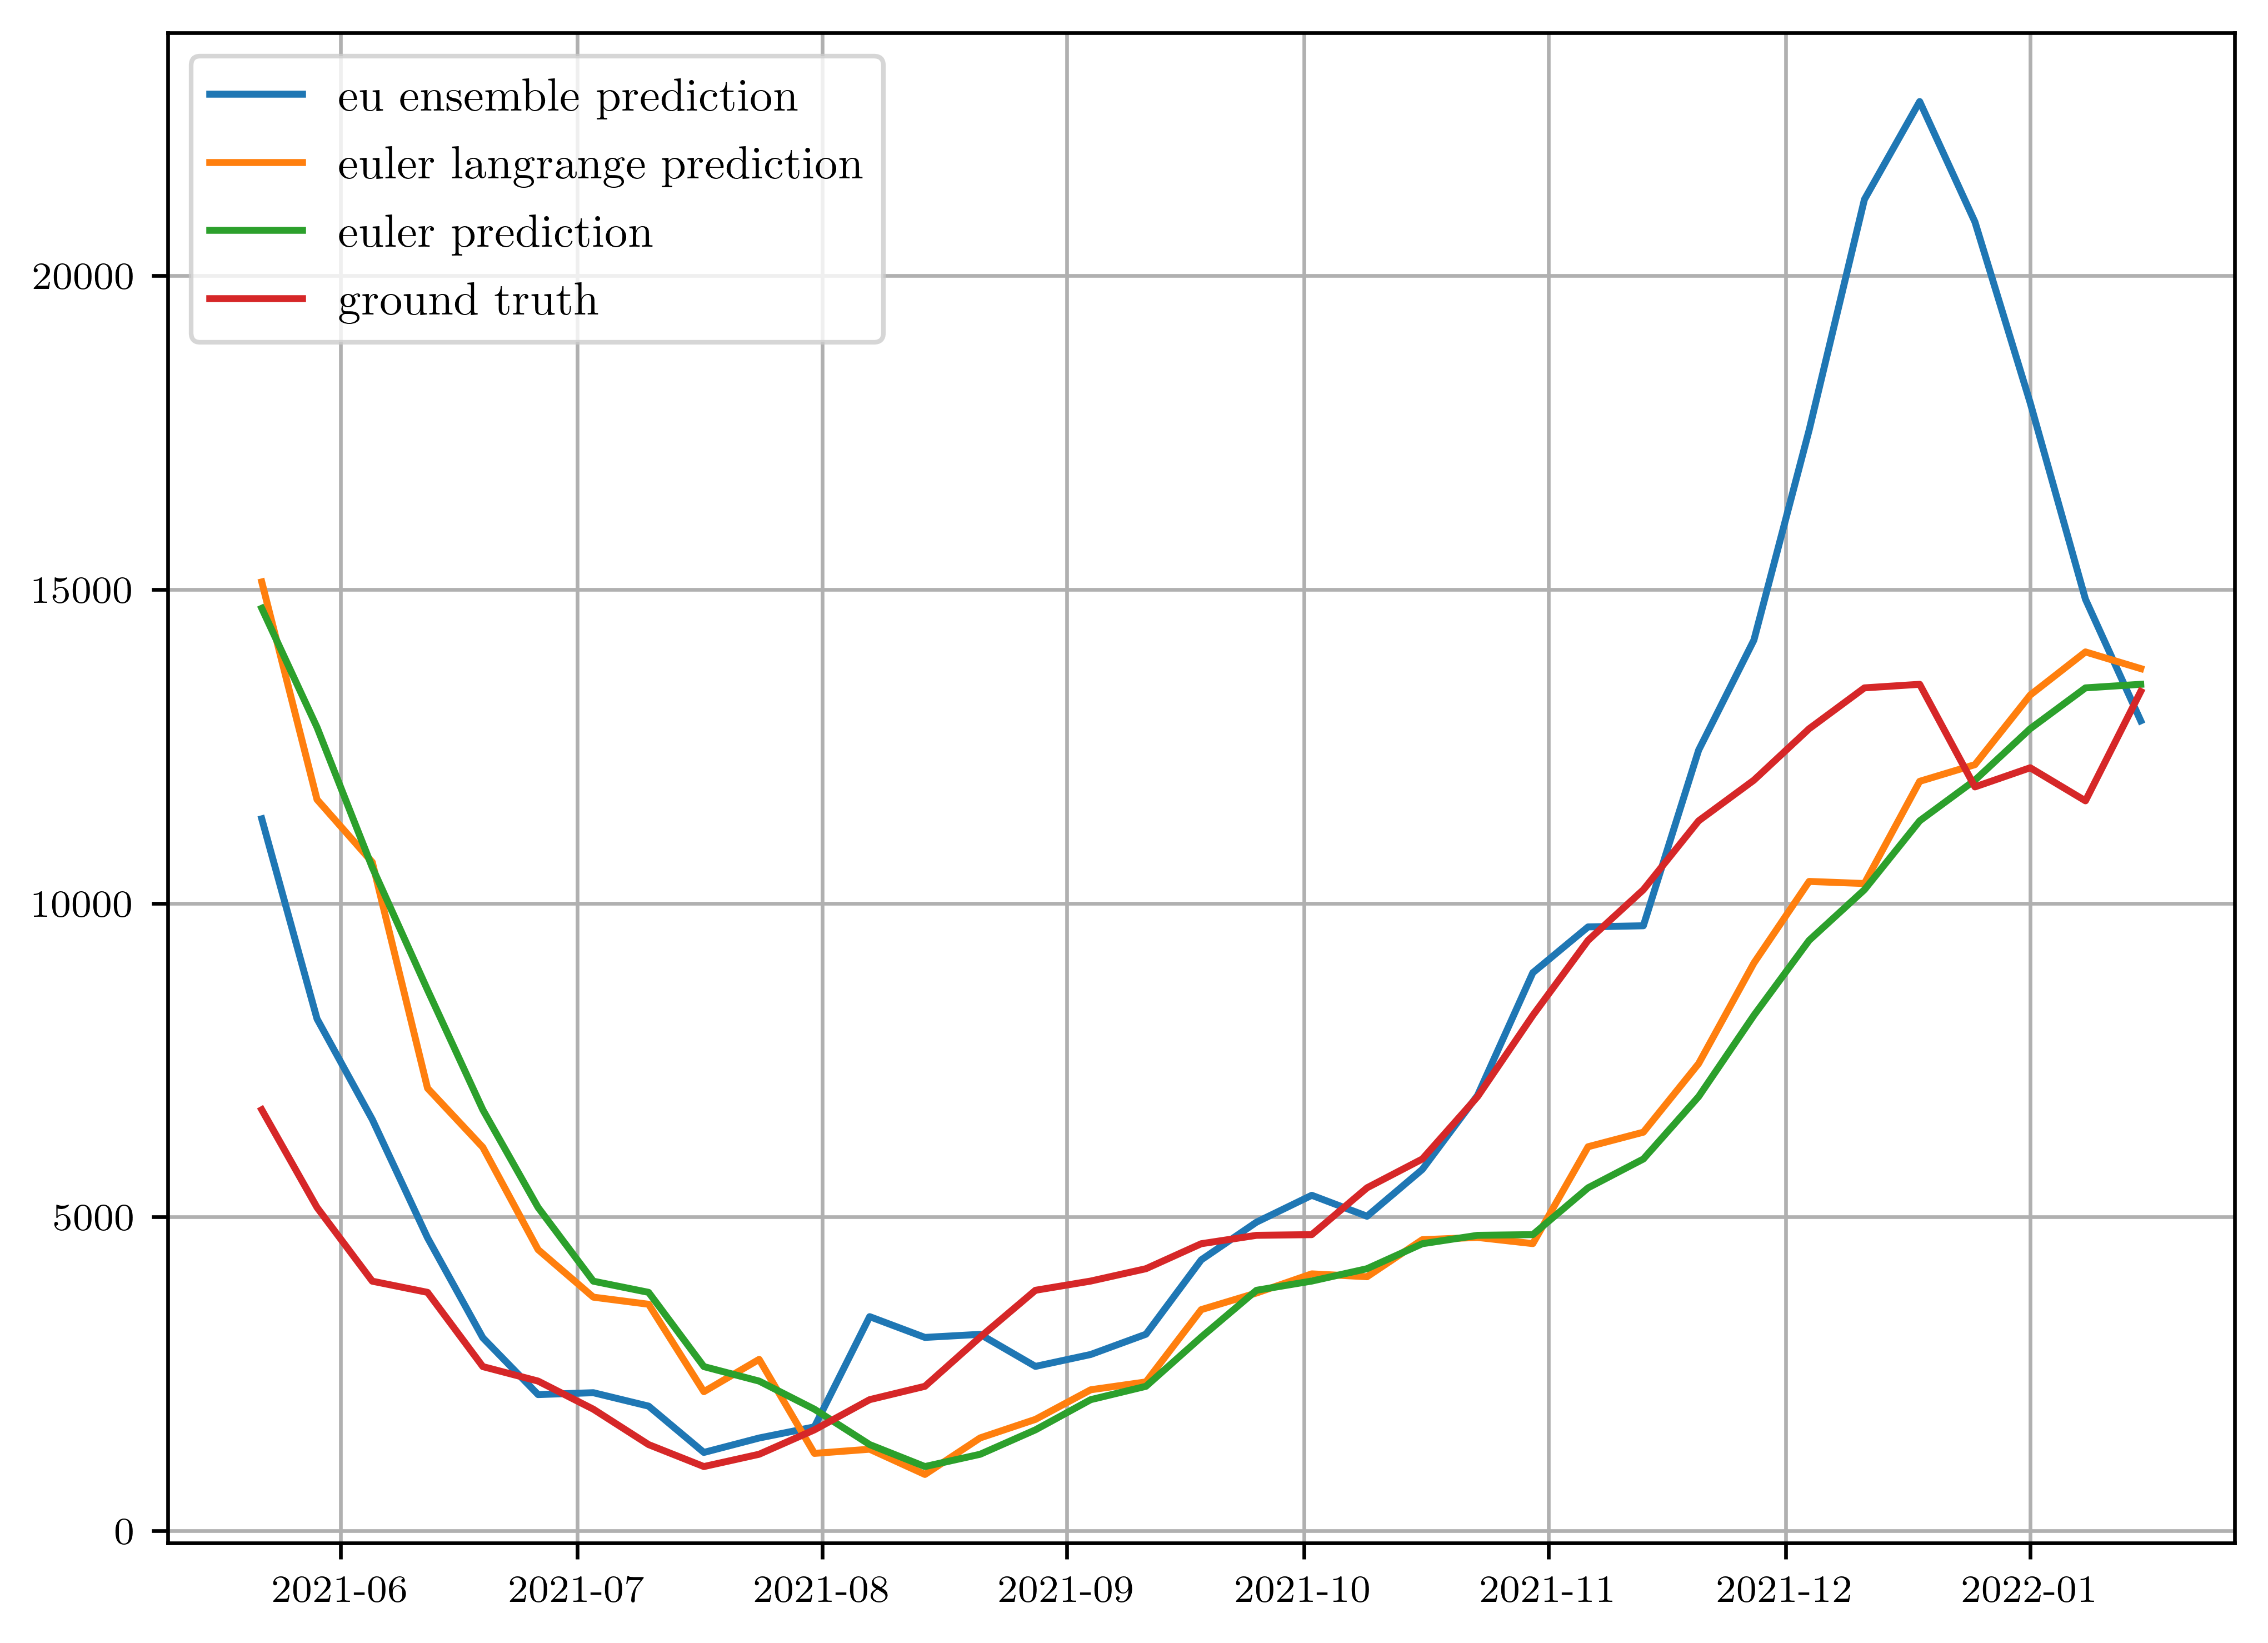

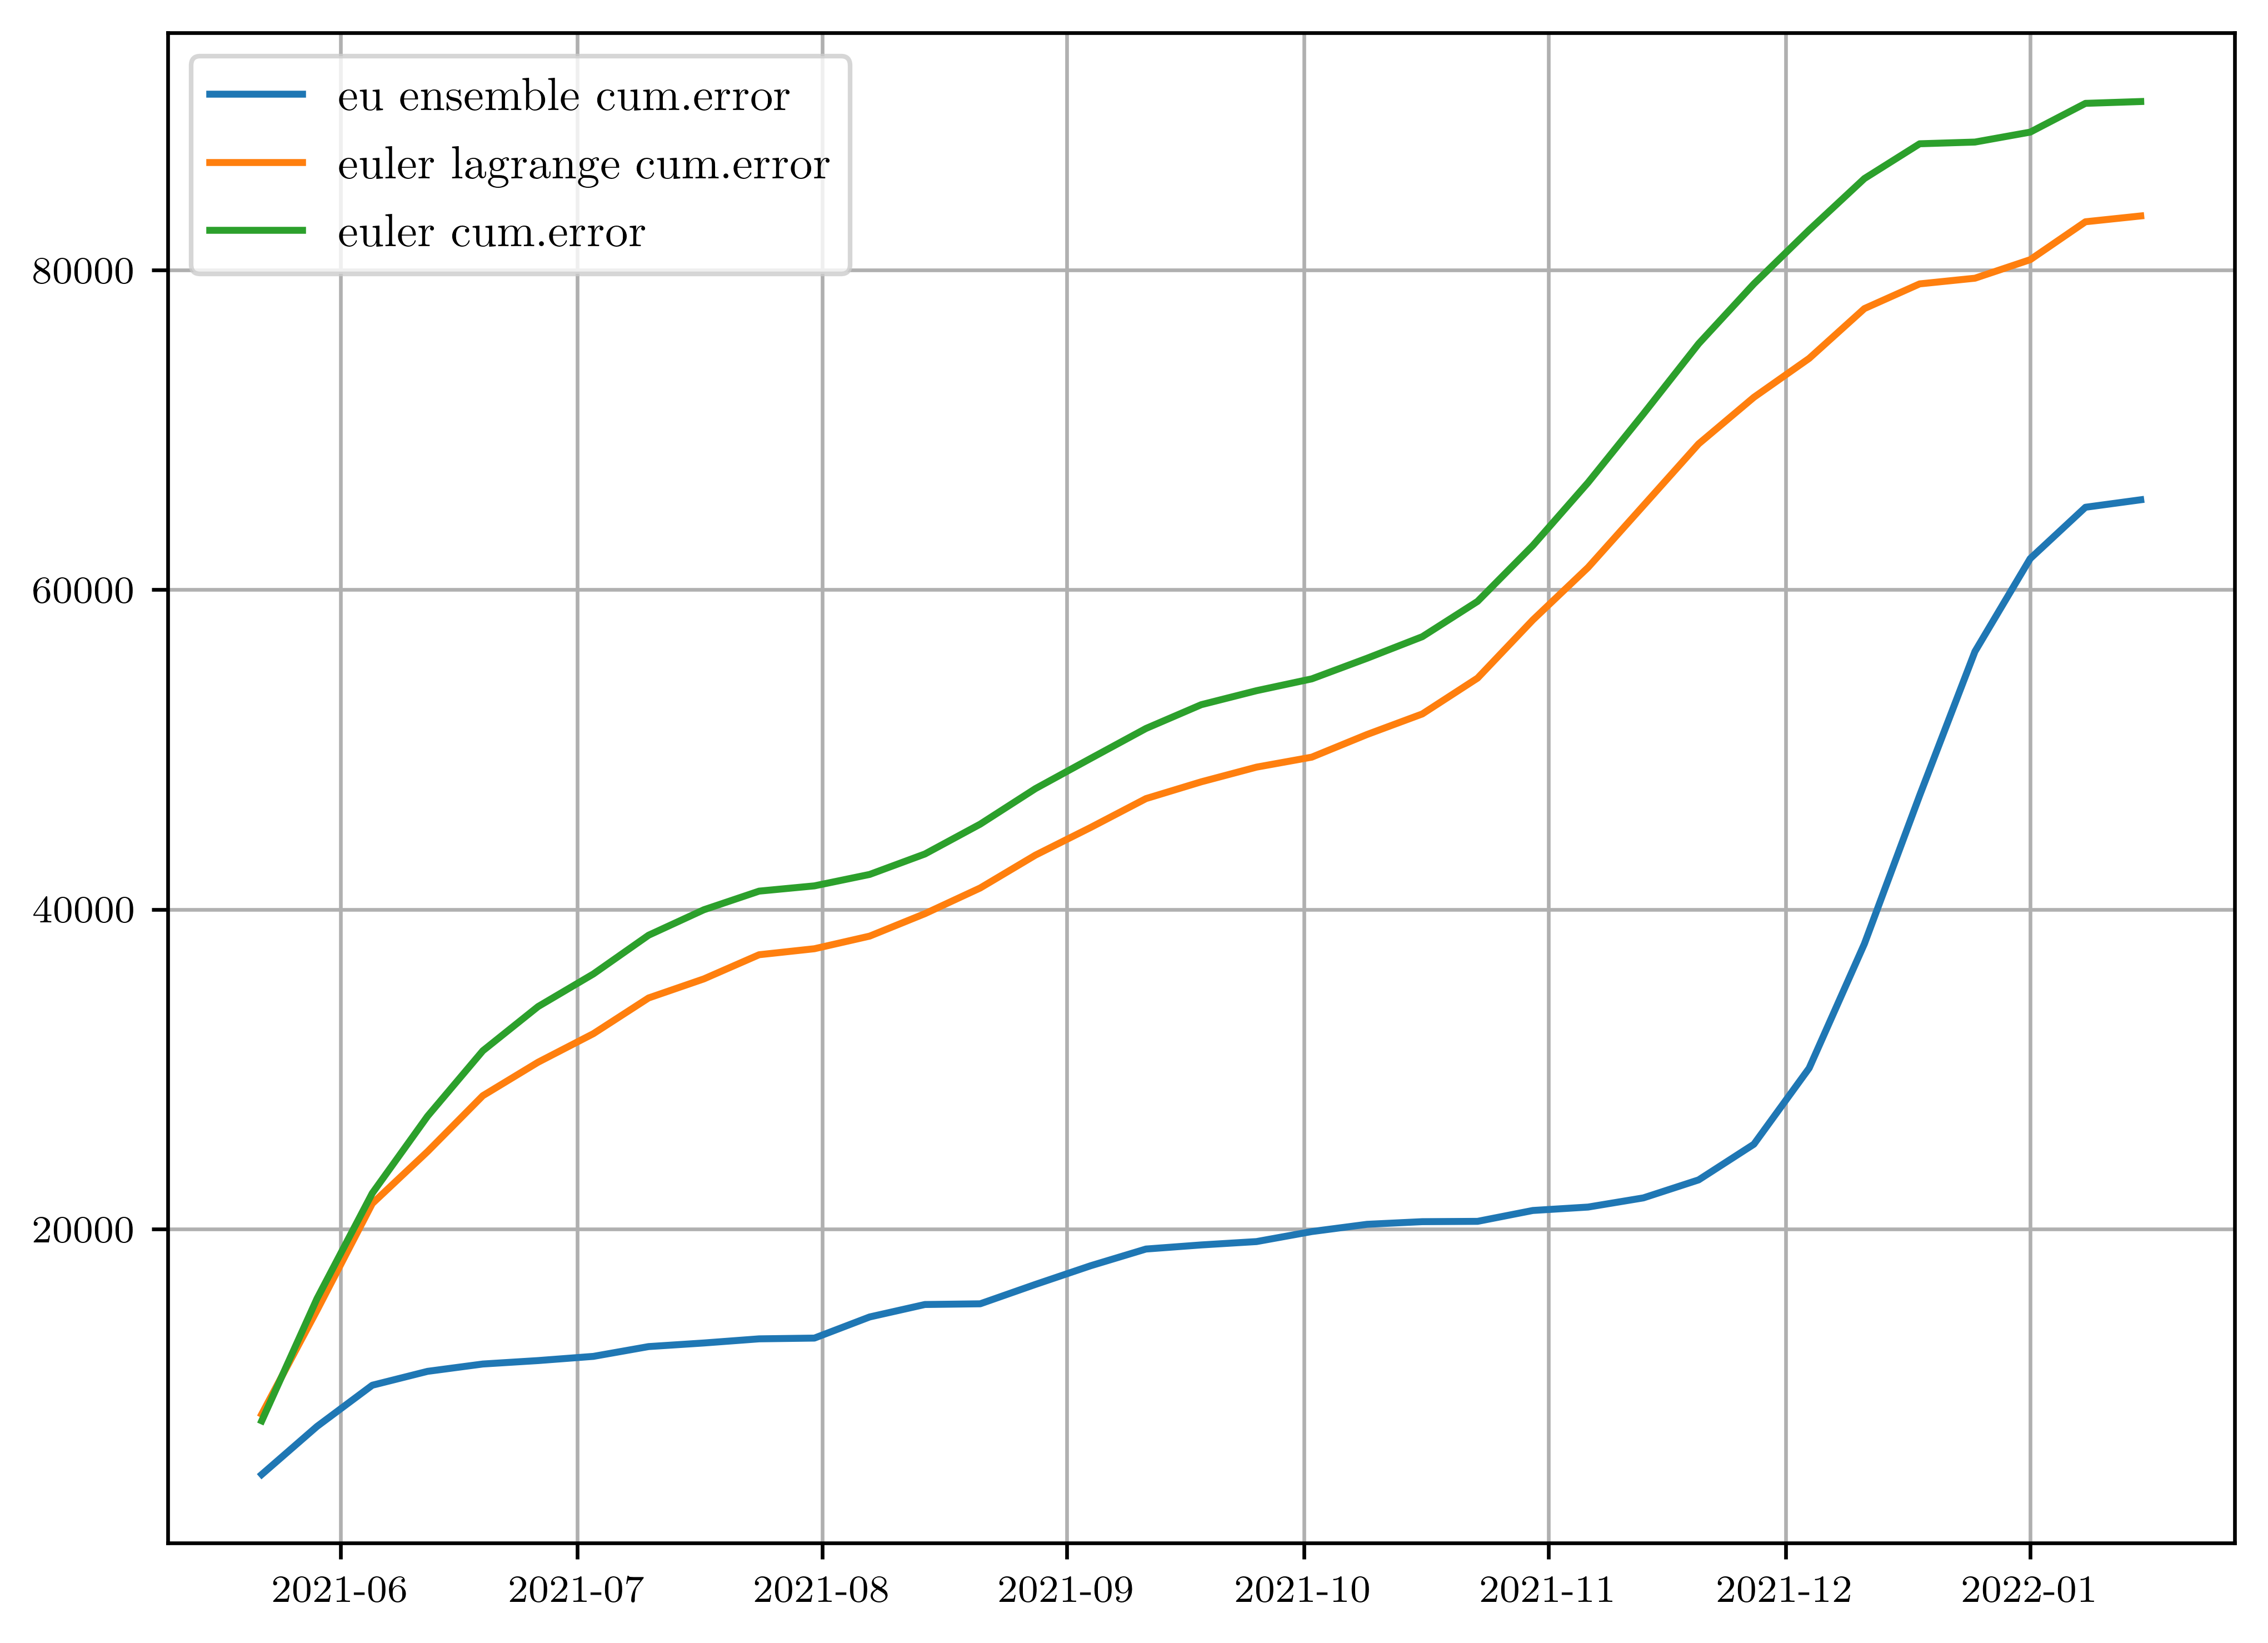

In [67]:
for week_forecast in [1,2,3,4]:
    path_results_str = f"results/{fetched_month_year_str}/EU"
    print(path_results_str)
    
    corr_derivative = False
    if (week_forecast == 1):
        df_euler = error_comparison(deaths_covid_data, data_point_1wk, forecast_dates_1wk, dates_1wk, dates_covid_data, 1, corr__ = corr_derivative , debug__ = False)
    elif (week_forecast == 2):
        df_euler = error_comparison(deaths_covid_data, data_point_2wk, forecast_dates_2wk, dates_2wk, dates_covid_data, 2, corr__ = corr_derivative )
    elif (week_forecast == 3):
        df_euler = error_comparison(deaths_covid_data, data_point_3wk, forecast_dates_3wk, dates_3wk, dates_covid_data, 3, corr__ = corr_derivative )
    elif (week_forecast == 4):
        df_euler = error_comparison(deaths_covid_data, data_point_4wk, forecast_dates_4wk, dates_4wk, dates_covid_data, 4, corr__ = corr_derivative )


    corr_derivative = True
    if (week_forecast == 1):
        df = error_comparison(deaths_covid_data, data_point_1wk, forecast_dates_1wk, dates_1wk, dates_covid_data, 1, corr__ = corr_derivative)
    elif (week_forecast == 2):
        df = error_comparison(deaths_covid_data, data_point_2wk, forecast_dates_2wk, dates_2wk, dates_covid_data, 2, corr__ = corr_derivative )
    elif (week_forecast == 3):
        df = error_comparison(deaths_covid_data, data_point_3wk, forecast_dates_3wk, dates_3wk, dates_covid_data, 3, corr__ = corr_derivative )
    elif (week_forecast == 4):
        df = error_comparison(deaths_covid_data, data_point_4wk, forecast_dates_4wk, dates_4wk, dates_covid_data, 4, corr__ = corr_derivative )

  
    from pathlib import Path
    output_dir = Path(f'../../{path_results_str}')
    output_dir.mkdir(parents=True, exist_ok=True)
    print(f"results going to {output_dir}")
    df.to_csv(f'{output_dir}/{fetched_month_year_str}_error_euler_langrange_cdc_week_{week_forecast}.csv')
    df_euler.to_csv(f'{output_dir}/{fetched_month_year_str}_error_euler_cdc_week_{week_forecast}.csv')
    print(f" csv path")
    print(f'{output_dir}/{fetched_month_year_str}_error_euler_langrange_cdc_week_{week_forecast}.csv')

    from matplotlib.pyplot import figure

    figure(figsize=(8, 6), dpi=600)
    plt.plot(df["target_prediction_date"], df["error_eu_ensemble"])
    plt.plot(df["target_prediction_date"], df["error_euler"])
    plt.plot(df_euler["target_prediction_date"], df_euler["error_euler"])
    plt.grid()
    plt.legend(['eu ensemble error','euler langrange error', 'euler error'])
    plt.savefig(f'{output_dir}/{fetched_month_year_str}_prediction_error_euler_langrange_week_{week_forecast}.pdf', dpi = 600)
    print("fig goes to ")
    print(f'{output_dir}/{fetched_month_year_str}_prediction_error_euler_langrange_week_{week_forecast}.pdf')

    figure(figsize=(8, 6), dpi=600)
    plt.plot(df["target_prediction_date"], df["eu_prediction_value"])
    plt.plot(df["target_prediction_date"], df["euler_prediction_value"])
    plt.plot(df_euler["target_prediction_date"], df_euler["euler_prediction_value"])
    plt.plot(df["target_prediction_date"], df["ground_truth_incidence"])
    plt.grid()
    plt.legend(['eu ensemble prediction','euler langrange prediction', 'euler prediction', 'ground truth'])
    plt.savefig(f'{output_dir}/{fetched_month_year_str}_predictions_euler_langrange_week_{week_forecast}.pdf', dpi = 600)


    figure(figsize=(8, 6), dpi=600)
    plt.plot(df["target_prediction_date"], df["cum_error_eu_ensemble"])
    plt.plot(df["target_prediction_date"], df["cum_error_euler"])
    plt.plot(df_euler["target_prediction_date"], df_euler["cum_error_euler"])
    plt.grid()
    plt.legend(['eu ensemble cum.error','euler lagrange cum.error', 'euler cum.error'])
    plt.savefig(f'{output_dir}/{fetched_month_year_str}_cumulative_prediction_error_euler_langrange_week_{week_forecast}.pdf', dpi = 600)

    print(f"week forecst {week_forecast}")
    print("cum eu error: ", df["cum_error_eu_ensemble"].iloc[-1])
    print("cum euler lagrange error: ",  df["cum_error_euler"].iloc[-1])
    print("cum euler error: ",  df_euler["cum_error_euler"].iloc[-1])